<a href="https://colab.research.google.com/github/Aomaphisara/ULckdresearch2023/blob/main/Association_rule(%E0%B9%81%E0%B8%9B%E0%B8%A5%E0%B8%87%E0%B8%82%E0%B9%89%E0%B8%AD%E0%B8%A1%E0%B8%B9%E0%B8%A5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/Assign7: Outliers/outlier_missfr.xlsx')
df.head()

,PatientUID,PatientVisitUID,Slopes,InPatient,OutPatient,Emergency,time_t1,eGFR_t1,VisitLocation,StartDTTM,...,L14-WBC,L15-Platelet,L19-Blood-sugar,L20-HbA1c,L21-Cholesterol,L22-Triglyceride,L23-LDL-Cholesterol,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio,LabLocation
0,2299,3386255,-7.158596,0,1,0,2017-10-03 09:19:54.710,63.60,เวชปฏิบัติทั่วไป (OPD)-D03,2016-08-15 08:13:26.043,...,4.9248,194.24,91.0,5.284,215.0,81.0,123.0,99.0,21.019,1
1,2299,4546471,5.550691,0,1,0,2018-12-12 09:18:49.913,70.20,เวชปฏิบัติทั่วไป (OPD)-D03,2017-10-03 07:37:22.777,...,5.1634,251.46,86.0,5.755,219.0,64.0,146.0,73.0,15.198,1
2,2299,5812902,-6.063710,0,1,0,2019-12-19 09:51:24.427,64.02,เวชปฏิบัติทั่วไป (OPD)-D03,2018-12-12 07:58:57.190,...,9.4100,313.00,100.0,5.300,193.0,62.0,129.0,65.0,30.879,1
3,2299,6947220,-12.812245,0,1,0,2021-03-04 10:01:42.113,48.54,เวชปฏิบัติทั่วไป (OPD)-D03,2019-12-19 08:19:38.647,...,4.3718,204.65,89.0,5.562,205.0,69.0,139.0,76.0,36.916,1
4,2299,8186767,28.287500,0,1,0,2022-04-21 08:45:54.580,80.47,เวชปฏิบัติทั่วไป (OPD)-D03,2021-03-04 07:55:40.703,...,5.4200,434.00,88.0,5.500,198.0,74.0,129.0,60.0,28.684,1


In [3]:
df.columns

Index(['PatientUID', 'PatientVisitUID', 'Slopes', 'InPatient', 'OutPatient',
       'Emergency', 'time_t1', 'eGFR_t1', 'VisitLocation', 'StartDTTM',
       'EndDttm', 'LabCwhen', 'G1M2-ARB', 'G3M1-Statin', 'G5M2-NSAIDs',
       'G1M5-Diuretic', 'G1M7-Beta-blocker', 'G1M3-Dihydropyridine-CCB',
       'G1M6-MRA', 'G1M1-ACEI', 'G2M2-Metformin', 'G2M3-DPP4-inhibitor',
       'G2M1-SU', 'G3M3-Fibrate', 'G2M5-SGLT2i', 'G4M1-Allopurinol',
       'G1M9-Vasodilator', 'G1M8-Alpha-blocker', 'G2M6-Insulin', 'G2M4-TZD',
       'G4M2-Febuxostat', 'G3M2-Ezetimibe', 'G1M4-Non-dihydropyridine-CCB',
       'G5M1-Ketoanalog-amino-acid', 'G2M7-GLP1-RA', 'G4M3-Uricosuric-agent',
       'Sex', 'Age', 'NATNL', 'BMI', 'BSA', 'Diastolic-BP', 'Systolic-BP',
       'D1-Hypertension', 'D2-Diabetes-mellitus', 'D3-Dyslipidemia', 'D4-SLE',
       'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis', 'D7-HIV-infection',
       'D8-HBV-infection', 'D9-HCV-infection', 'D10-Ischemic-heart-disease',
       'D11-Heart-failu

In [4]:
df.shape

(52620, 82)

In [5]:
df['VisitLocation'].unique()

array(['เวชปฏิบัติทั่วไป (OPD)-D03',
       'หน่วยทะเบียนกลาง(Test พิเศษ)เวชศาสตร์ชันสูตร',
       'ความดันโลหิตสูงวิกฤต (คลินิก)-DV193',
       'บูรณาการนอกเวลา (คลินิก)-OD191', 'ตรวจสุขภาพ (คลินิก)-D1901',
       'รังสีวินิจฉัย (OPD)-D14', 'ออร์โธปิดิกส์ (OPD)-D09',
       'OPD AE-DV191', 'อายุรกรรม 9 (OPD)-D08', 'หอผู้ป่วยสว.ชั้น12-SV12',
       'หอผู้ป่วย 6ข-6BW', 'หอผู้ป่วย  AE2-E2W',
       'โรคทางเดินอาหารและตับ (คลินิก)-D721',
       'หน่วยคลินิกพิเศษศูนย์บริการทางการแพทย์ชั้นเลิศ',
       'อายุรกรรม 8 (OPD)-D07', 'ห้องตรวจการได้ยิน -D202',
       'หอผู้ป่วย 5ค-5CW', 'โรคภูมิแพ้ (คลินิก)-D204', 'จักษุ (OPD)-D01',
       'โรคต่อมไร้ท่อ (คลินิก)-D730',
       'โรคระบบประสาทและสมอง (คลินิก)-D713', 'ไตเสื่อม CKD Clinic-D2203',
       'PCU สามเหลี่ยม-DV263', 'ตรวจสุขภาพบุคลากรประจำปี (คลินิก)-D1702',
       'Epilepsy (คลินิก)-D714', 'หอผู้ป่วย 4ค-4CW',
       'หอผู้ป่วยสว.ชั้น13-SV13', 'TB (คลินิก)-D707',
       'หอผู้ป่วยสงฆ์อาพาธ-MW', 'โรคเลือดและต่อมน้ำเหลือง (คลินิก)-D716',
    

In [6]:
len(df['VisitLocation'].unique())

192

In [7]:
selected_columns = ['InPatient', 'OutPatient', 'Emergency','NATNL',
'Slopes', 'Sex', 'Age', 'BMI','BSA', 'Diastolic-BP', 'Systolic-BP',
'L1-eGFR', 'L2-BUN', 'L3-Creatinine',
       'L4-Sodium', 'L5-Potassium', 'L6-Chloride', 'L7-Bicarbonate', 'L8-Uric',
       'L9-Calcium', 'L10-Phosphorus', 'L11-Albumin', 'L12-Hemoglobin',
       'L13-Hematocrit', 'L14-WBC', 'L15-Platelet', 'L19-Blood-sugar',
       'L20-HbA1c', 'L21-Cholesterol', 'L22-Triglyceride',
       'L23-LDL-Cholesterol', 'L24-HDL-Cholesterol',
       'L28-UrineProtein-Cr-ratio',
'G1M2-ARB', 'G3M1-Statin',
       'G5M2-NSAIDs', 'G1M5-Diuretic', 'G1M7-Beta-blocker',
       'G1M3-Dihydropyridine-CCB', 'G1M6-MRA', 'G1M1-ACEI', 'G2M2-Metformin',
       'G2M3-DPP4-inhibitor', 'G2M1-SU', 'G3M3-Fibrate', 'G2M5-SGLT2i',
       'G4M1-Allopurinol', 'G1M9-Vasodilator', 'G1M8-Alpha-blocker',
       'G2M6-Insulin', 'G2M4-TZD', 'G4M2-Febuxostat', 'G3M2-Ezetimibe',
       'G1M4-Non-dihydropyridine-CCB', 'G5M1-Ketoanalog-amino-acid',
       'G2M7-GLP1-RA', 'G4M3-Uricosuric-agent',
'D1-Hypertension',
       'D2-Diabetes-mellitus', 'D3-Dyslipidemia', 'D4-SLE',
       'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis', 'D7-HIV-infection',
       'D8-HBV-infection', 'D9-HCV-infection', 'D10-Ischemic-heart-disease',
       'D11-Heart-failure', 'D12-Thalassemia', 'D13-Kidney-stone',
       'D14-Valvular-heart-disease', 'D15-Solid-malignancy',
       'D16-Hematologic-malignancy']
df_selected = df[selected_columns]

In [8]:
df_selected.shape

(52620, 73)

In [9]:
df_selected.describe()

,InPatient,OutPatient,Emergency,NATNL,Slopes,Sex,Age,BMI,BSA,Diastolic-BP,...,D7-HIV-infection,D8-HBV-infection,D9-HCV-infection,D10-Ischemic-heart-disease,D11-Heart-failure,D12-Thalassemia,D13-Kidney-stone,D14-Valvular-heart-disease,D15-Solid-malignancy,D16-Hematologic-malignancy
count,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,...,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000
mean,0.088027,0.868890,0.043082,0.013816,-2.169255,0.479932,66.812828,24.657083,1.656821,73.153166,...,0.002471,0.007982,0.009977,0.014994,0.005530,0.001558,0.020334,0.008837,0.043843,0.013208
std,0.283337,0.337524,0.203045,0.168555,9.785498,0.499602,11.646585,3.652668,0.164151,11.533484,...,0.049644,0.089410,0.099387,0.122621,0.075431,0.039445,0.144075,0.094197,0.209699,0.114664
min,0.000000,0.000000,0.000000,0.000000,-79.002653,0.000000,18.000000,11.120000,1.000000,11.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,-6.381052,0.000000,60.000000,22.370000,1.540000,66.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,-1.706494,0.000000,67.000000,24.467650,1.650000,73.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,2.488436,1.000000,75.000000,26.560000,1.770000,80.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,3.000000,106.892857,1.000000,102.000000,49.430000,3.000000,120.000000,...,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,3.000000,2.000000,2.000000,2.000000


In [10]:
df_selected.head()

,InPatient,OutPatient,Emergency,NATNL,Slopes,Sex,Age,BMI,BSA,Diastolic-BP,...,D7-HIV-infection,D8-HBV-infection,D9-HCV-infection,D10-Ischemic-heart-disease,D11-Heart-failure,D12-Thalassemia,D13-Kidney-stone,D14-Valvular-heart-disease,D15-Solid-malignancy,D16-Hematologic-malignancy
0,0,1,0,0,-7.158596,1,73,20.80,1.39,75.0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,5.550691,1,74,20.27,1.38,64.0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,-6.063710,1,75,20.72,1.38,76.0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,-12.812245,1,76,20.27,1.36,66.0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,28.287500,1,78,19.05,1.33,57.0,...,0,0,0,0,0,0,0,0,0,0


##แบ่งข้อมูล

### Age

In [11]:
df_selected['Age'].describe()

count    52620.000000
mean        66.812828
std         11.646585
min         18.000000
25%         60.000000
50%         67.000000
75%         75.000000
max        102.000000
Name: Age, dtype: float64

In [12]:
import pandas as pd

def binning(col, cut_points, labels=None):
    minval = col.min()
    maxval = col.max()
    cut_points = sorted(set(cut_points))
    break_points = [minval] + cut_points + [maxval]
    if not labels:
        labels = range(len(cut_points) + 1)
    colBin = pd.cut(col, bins=break_points, labels=labels, include_lowest=True, duplicates='drop')
    return colBin

# Example cut points and labels
cut_points = [18, 65]
labels = ['Adult', 'Older']

# Assuming df_selected is your DataFrame and 'Age' is a column in it
# Replace df_selected['Age'] with your actual column name if different
df_selected['Age_range'] = binning(df_selected['Age'], cut_points, labels)

<ipython-input-12-9afb82a88996>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Age_range'] = binning(df_selected['Age'], cut_points, labels)


https://service-manual.nhs.uk/content/inclusive-content/age

###Slope

In [13]:
def categorize_slope(slope):
    if slope < 0.75:
        return 'Better'  # Slope ลดลงน้อยกว่า 0.75 ml/min/year
    elif slope > 5:
        return 'Worse'  # Slope ลดลงมากกว่า 5 ml/min/year
    elif 0.75 <= slope <= 5:
        return 'Between'  # Slope อยู่ระหว่าง 0.75 และ 5 ml/min/year #Intermediate
    else:
        return 'Out of range'  # กรณีที่ไม่อยู่ในช่วงที่กำหนด

# Assuming df_selected is your DataFrame and 'Slopes' is a column in it
# Replace df_selected['Slopes'] with your actual column name if different
df_selected['Slopes_Category'] = df_selected['Slopes'].apply(categorize_slope)

<ipython-input-13-8ffce44cffb2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Slopes_Category'] = df_selected['Slopes'].apply(categorize_slope)


###Systolic BP

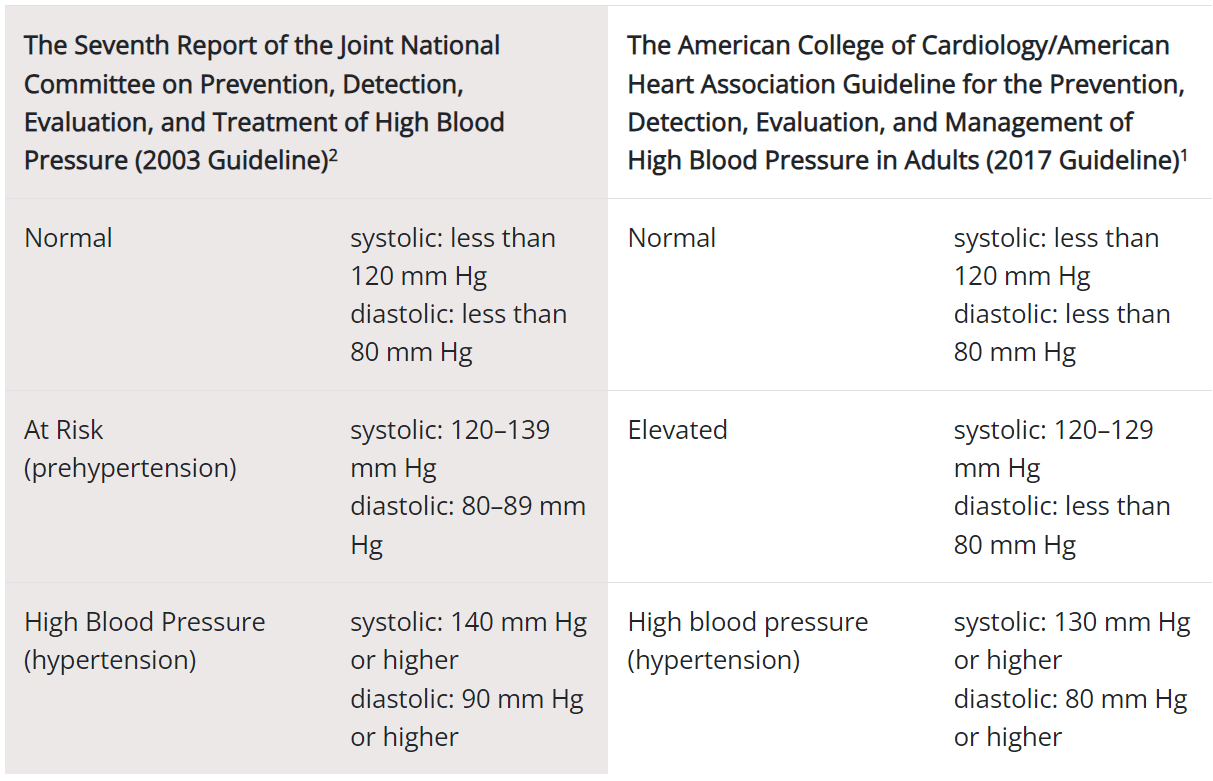

In [14]:
import pandas as pd

def binning(col, cut_points, labels):
    minval = col.min()
    maxval = col.max()
    cut_points = sorted(set(cut_points))  # Sort the cut_points in ascending order
    break_points = [minval] + cut_points + [maxval]
    colBin = pd.cut(col, bins=break_points, labels=labels, include_lowest=True)
    return colBin

# กำหนดค่าที่ต้องการแบ่งช่วง
cut_points = [119, 139]
labels = ['Normal', 'Risk', 'Hypertension']

# สมมติว่า df_selected เป็น DataFrame ของคุณและ 'Systolic-BP' เป็นชื่อคอลัมน์ที่ต้องการใช้
# แทน df_selected['Systolic-BP'] ด้วยชื่อคอลัมน์ของคุณ
df_selected['SBP'] = binning(df_selected['Systolic-BP'], cut_points, labels)

<ipython-input-14-981471f26f10>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['SBP'] = binning(df_selected['Systolic-BP'], cut_points, labels)


In [15]:
df_selected[df_selected['Systolic-BP'] == 139][['SBP', 'Systolic-BP']].head()

,SBP,Systolic-BP
42,Risk,139.0
48,Risk,139.0
107,Risk,139.0
111,Risk,139.0
134,Risk,139.0


###Diastolic BP

In [16]:
import pandas as pd

def binning(col, cut_points, labels):
    minval = col.min()
    maxval = col.max()
    cut_points = sorted(set(cut_points))  # Sort the cut_points in ascending order
    break_points = [minval] + cut_points + [maxval]
    colBin = pd.cut(col, bins=break_points, labels=labels, include_lowest=True)
    return colBin

# กำหนดค่าที่ต้องการแบ่งช่วง
cut_points = [79, 89]
labels = ['Normal', 'Risk', 'Hypertension']

# Assuming df_selected is your DataFrame and 'Age' is a column in it
# Replace df_selected['Age'] with your actual column name if different
df_selected['DBP'] = binning(df_selected['Diastolic-BP'], cut_points, labels)

<ipython-input-16-910b294e8000>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['DBP'] = binning(df_selected['Diastolic-BP'], cut_points, labels)


In [17]:
df_selected[df_selected['Diastolic-BP'] == 89][['DBP', 'Diastolic-BP']].head()

,DBP,Diastolic-BP
259,Risk,89.0
303,Risk,89.0
754,Risk,89.0
1085,Risk,89.0
1087,Risk,89.0


แหล่งที่มา : https://www.cdc.gov/bloodpressure/about.htm

###BSA

In [18]:
df_selected['BSA'].describe()

count    52620.000000
mean         1.656821
std          0.164151
min          1.000000
25%          1.540000
50%          1.650000
75%          1.770000
max          3.000000
Name: BSA, dtype: float64

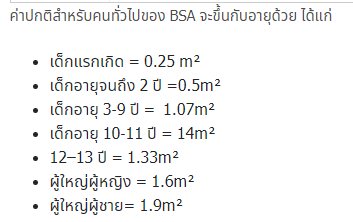

In [19]:
def interpret_BSA_by_sex(BSA_value, sex):
    if sex == 0:  # Male
        if 1.9 <= BSA_value < 2.0:
            return "Normal"
        else:
            return "Abnormal"
    elif sex == 1:  # Female
        if 1.6 <= BSA_value < 1.7:
            return "Normal"
        else:
            return "Abnormal"

# Add a new column 'BSA_range' based on 'BSA' values and 'Sex'
df_selected['BSA_range'] = df_selected.apply(lambda row: interpret_BSA_by_sex(row['BSA'], row['Sex']), axis=1)

<ipython-input-19-b276987f67f3>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['BSA_range'] = df_selected.apply(lambda row: interpret_BSA_by_sex(row['BSA'], row['Sex']), axis=1)


แหล่งที่มา : https://www.rxlist.com/body_surface_area/definition.htm

In [20]:
df_selected[df_selected['BSA'] ==1.6][['BSA_range', 'BSA','Sex']].head()

,BSA_range,BSA,Sex
23,Normal,1.6,1
102,Abnormal,1.6,0
104,Abnormal,1.6,0
333,Normal,1.6,1
352,Abnormal,1.6,0


###BMI

In [21]:
def interpret_BMI(BMI_value):
    if BMI_value < 18.5:
        return 'Underweight'
    elif 18.5 <= BMI_value < 25:
        return 'Healthy weight'
    elif 25 <= BMI_value < 30:
        return 'Overweight'
    else:
        return 'Obesity'

# เพิ่มคอลัมน์ 'bmi' ที่บอกระดับของ 'interpret_BMI'
df_selected['BMI_range'] = df_selected['BMI'].apply(interpret_BMI)

<ipython-input-21-cb8db4119a6f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['BMI_range'] = df_selected['BMI'].apply(interpret_BMI)


แหล่งที่มา : https://www.cdc.gov/obesity/basics/adult-defining.html#:~:text=If%20your%20BMI%20is%20less,falls%20within%20the%20obesity%20range.

###eGFR

In [22]:
# สร้างฟังก์ชันสำหรับแบ่งข้อมูลตามระดับ 'Recent_eGFR'
def categorize_eGFR(eGFR_value):
    if eGFR_value >= 90:
        return 'stage 1'
    elif 89.99 >= eGFR_value >= 60:
        return 'stage 2'
    elif 59.99 >= eGFR_value >= 30:
        return 'stage 3'
    elif 29.99 >= eGFR_value >= 15:
        return 'stage 4'
    else:
        return 'stage 5'

# เพิ่มคอลัมน์ 'eGFR_Category' ที่บอกระดับของ 'Recent_eGFR'
#df_selected['eGFR_t1_Category'] = df_selected['eGFR_t1'].apply(categorize_eGFR)
df_selected['eGFR_Category'] = df_selected['L1-eGFR'].apply(categorize_eGFR)

<ipython-input-22-1ae029d55b17>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['eGFR_Category'] = df_selected['L1-eGFR'].apply(categorize_eGFR)


แหล่งที่มา : https://www.kidney.org/content/kidney-failure-risk-factor-estimated-glomerular-filtration-rate-egfr

###BUN

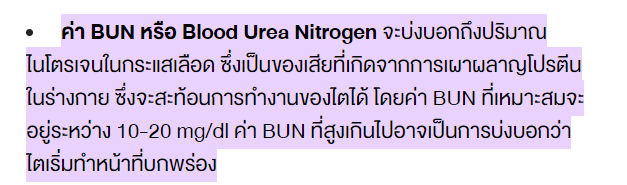

In [23]:
def interpret_BUN(BUN_value):
    if BUN_value < 10:
        return 'Low'
    elif 10 <= BUN_value <= 20:
        return 'Normal'
    else:
        return 'High'

# Add a new column 'BUN_level' based on 'BUN' values
df_selected['BUN'] = df_selected['L2-BUN'].apply(interpret_BUN)

<ipython-input-23-6adf039b1a1c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['BUN'] = df_selected['L2-BUN'].apply(interpret_BUN)


แหล่งที่มา : https://hdmall.co.th/c/kidney-screening

###Creatinine

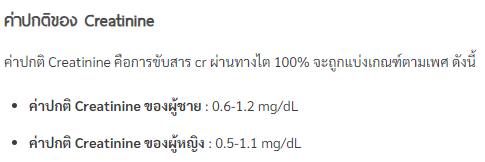

In [24]:
#def interpret_creatinine_by_sex(creatinine_value, sex):
#   if sex == 0:  # Male
 #       if 0.6 <= creatinine_value <= 1.2:
 #           return 'Normal'
  #      elif creatinine_value < 0.6:
  #          return 'Low'
  #      else:
  #          return 'High'
  #  elif sex == 1:  # Female
  #      if 0.5 <= creatinine_value <= 1.1:
  #          return 'Normal'
 #       elif creatinine_value < 0.5:
  #          return 'Low'
 #       else:
  #          return 'High'

# Add a new column 'Creatinine_Interpretation' based on 'Creatinine' values and 'Sex'
#df_selected['Creatinine'] = df_selected.apply(lambda row: interpret_creatinine_by_sex(row['L3-Creatinine'], row['Sex']), axis=1)

แหล่งที่มา : https://www.samitivejchinatown.com/th/health-article/renal-function-test

###Sodium

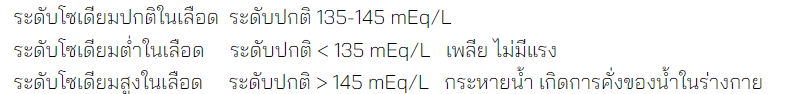

In [25]:
def interpret_sodium(sodium_value):
    if sodium_value < 135:
        return 'Low'
    elif 135 <= sodium_value <= 145:
        return 'Normal'
    else:
        return 'High'

# Add a new column 'sodium_level' based on 'L4-Sodium' values
df_selected['Sodium'] = df_selected['L4-Sodium'].apply(interpret_sodium)

###Potassium

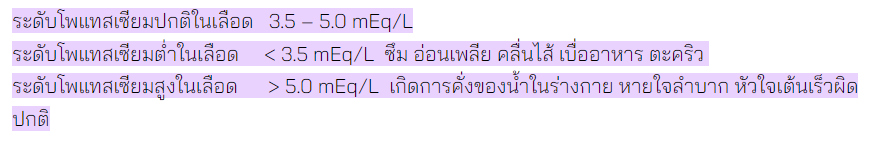

In [26]:
def interpret_potassium(potassium_value):
    if potassium_value < 3.5:
        return 'Low'
    elif 3.5 <= potassium_value <= 5.0:
        return 'Normal'
    else:
        return 'High'

# Add a new column 'potassium_level' based on 'L5-Potassium' values
df_selected['Potassium'] = df_selected['L5-Potassium'].apply(interpret_potassium)


แหล่งที่มา : https://sriphat.med.cmu.ac.th/th/knowledge-61#:~:text=%E0%B9%82%E0%B8%8B%E0%B9%80%E0%B8%94%E0%B8%B5%E0%B8%A2%E0%B8%A1%20%E0%B8%84%E0%B8%B7%E0%B8%AD%E0%B8%AD%E0%B8%B0%E0%B9%84%E0%B8%A3&text=%E0%B8%A3%E0%B8%B0%E0%B8%94%E0%B8%B1%E0%B8%9A%E0%B9%82%E0%B8%8B%E0%B9%80%E0%B8%94%E0%B8%B5%E0%B8%A2%E0%B8%A1%E0%B8%9B%E0%B8%81%E0%B8%95%E0%B8%B4%E0%B9%83%E0%B8%99%E0%B9%80%E0%B8%A5%E0%B8%B7%E0%B8%AD%E0%B8%94,%E0%B8%84%E0%B8%B1%E0%B9%88%E0%B8%87%E0%B8%82%E0%B8%AD%E0%B8%87%E0%B8%99%E0%B9%89%E0%B8%B3%E0%B9%83%E0%B8%99%E0%B8%A3%E0%B9%88%E0%B8%B2%E0%B8%87%E0%B8%81%E0%B8%B2%E0%B8%A2

###Chloride

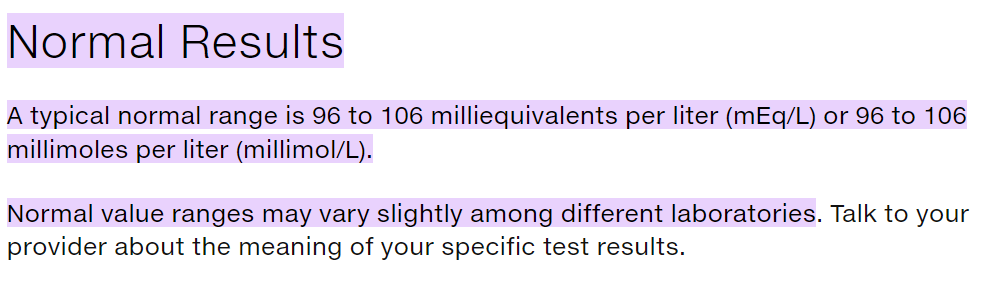

In [27]:
def interpret_chloride(chloride_value):
    if chloride_value < 96:
        return 'Low'
    elif 96 <= chloride_value <= 106:
        return 'Normal'
    else:
        return 'High'

# Add a new column 'chloride_level' based on 'L6-Chloride' values
df_selected['Chloride'] = df_selected['L6-Chloride'].apply(interpret_chloride)


แหล่งที่มา : https://www.mountsinai.org/health-library/tests/chloride-test-blood#:~:text=Normal%20Results,vary%20slightly%20among%20different%20laboratories.

###Bicarbonate

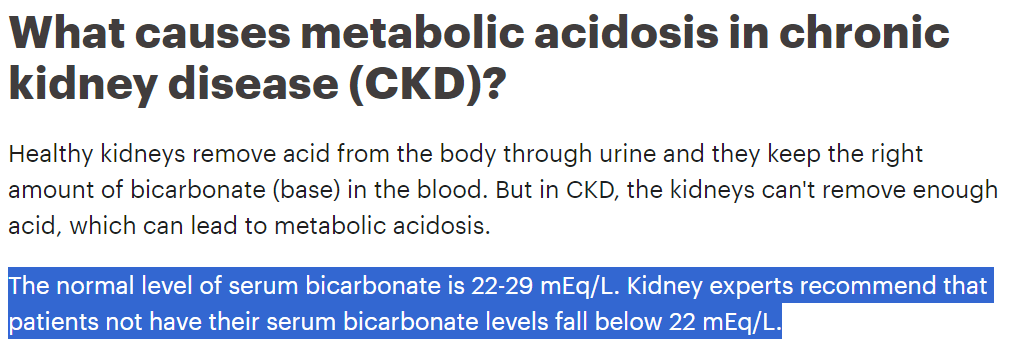

In [28]:
def interpret_bicarbonate(bicarbonate_value):
    if bicarbonate_value < 22:
        return 'Low'
    elif 22 <= bicarbonate_value <= 29:
        return 'Normal'
    else:
        return 'High'

# Add a new column 'bicarbonate_level' based on 'L7-Bicarbonate' values
df_selected['Bicarbonate'] = df_selected['L7-Bicarbonate'].apply(interpret_bicarbonate)

In [29]:
df_selected[df_selected['L7-Bicarbonate'] == 30][['L7-Bicarbonate', 'Bicarbonate']].head()

,L7-Bicarbonate,Bicarbonate
504,30.0,High
1290,30.0,High
1999,30.0,High
2042,30.0,High
3095,30.0,High


แหล่งที่มา : https://www.kidney.org/content/kidney-failure-risk-factor-serum-bicarbonate

###Uric

https://www.ucsfhealth.org/medical-tests/uric-acid----blood-

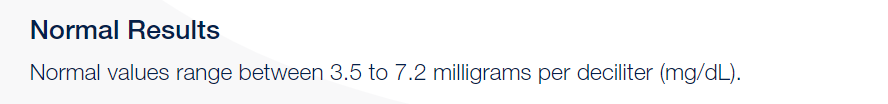

In [30]:
def interpret_uric(uric_value):
     if uric_value < 3.5:
        return 'Low'
     elif 3.5 <= uric_value <= 7.2:
        return 'Normal'
     else:
        return 'High'

# Add a new column 'uric' based on 'L8-Uric' values
df_selected['Uric'] = df_selected['L8-Uric'].apply(interpret_uric)


###Calcium

https://www.ucsfhealth.org/medical-tests/calcium-blood-test#:~:text=Normal%20Results,or%20may%20test%20different%20specimens.

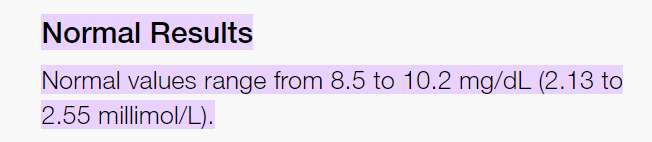

In [31]:
def interpret_calcium(calcium_value):
    if calcium_value < 8.5:
        return 'Low'
    elif 8.5 <= calcium_value <= 10.2:
        return 'Normal'
    else:
        return 'High'

# Add a new column 'calcium_level' based on 'L9-Calcium' values
df_selected['Calcium'] = df_selected['L9-Calcium'].apply(interpret_calcium)

###Phosphorus

https://www.ucsfhealth.org/medical-tests/phosphorus-blood-test

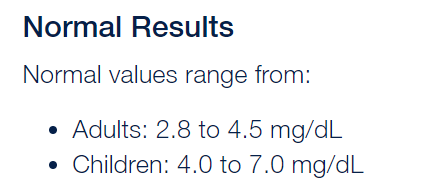

In [32]:
def interpret_phosphorus(phosphorus_value):
    if phosphorus_value < 2.8:
        return 'Low'
    elif 2.8 <= phosphorus_value <= 4.5:
        return 'Normal'
    else:
        return 'High'

# Add a new column 'phosphorus_level' based on 'L10-Phosphorus' values
df_selected['Phosphorus'] = df_selected['L10-Phosphorus'].apply(interpret_phosphorus)

###Albumin

https://www.ucsfhealth.org/medical-tests/albumin-blood-(serum)-test#:~:text=The%20normal%20range%20is%203.4,vary%20slightly%20among%20different%20laboratories.

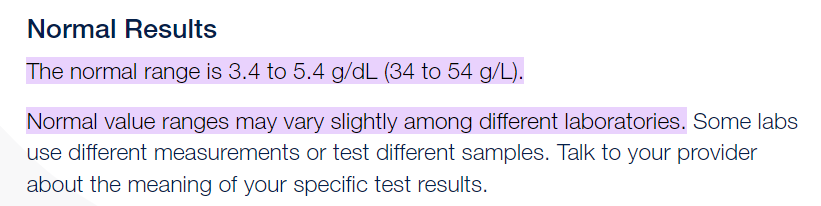

In [33]:
def interpret_albumin(albumin_value):
    if albumin_value < 3.4:
        return 'Low'
    elif 3.4 <= albumin_value <= 5.4:
        return 'Normal'
    else:
        return 'High'

# Add a new column 'albumin_level' based on 'L11-Albumin' values
df_selected['Albumin'] = df_selected['L11-Albumin'].apply(interpret_albumin)

###Hemoglobin

https://www.ucsfhealth.org/medical-tests/hemoglobin

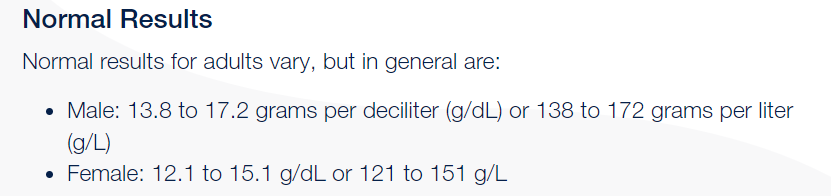

In [34]:
def interpret_Hemoglobin_by_sex(Hemoglobin_value, sex):
    if sex == 0:  # Male
        if 13.8 <= Hemoglobin_value <= 17.2:
            return 'Normal'
        elif Hemoglobin_value < 13.8:
            return 'Low'
        else:
            return 'High'
    elif sex == 1:  # Female
        if 12.1 <= Hemoglobin_value <= 15.1:
            return 'Normal'
        elif Hemoglobin_value < 12.1:
            return 'Low'
        else:
            return 'High'

# Add a new column 'Hemoglobinl' based on 'L12-Hemoglobin' values and 'Sex'
df_selected['Hemoglobin'] = df_selected.apply(lambda row: interpret_Hemoglobin_by_sex(row['L12-Hemoglobin'], row['Sex']), axis=1)

###Hematocrit

https://www.redcrossblood.org/donate-blood/dlp/hematocrit.html#:~:text=A%20hematocrit%20level%20below%20the,may%20indicate%20polycythemia%20or%20erythrocytosis.

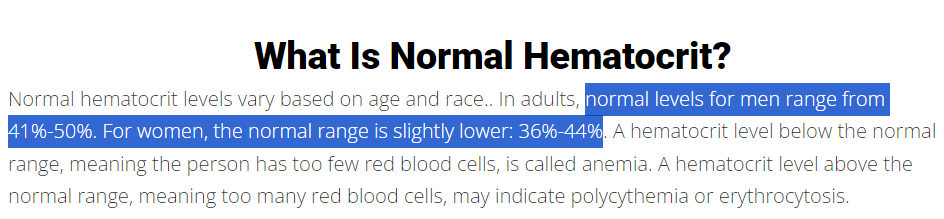

In [35]:
def interpret_Hematocrit_by_sex(Hematocrit_value, sex):
    if sex == 0:  # Male
        if 41 <= Hematocrit_value <= 50:
            return 'Normal'
        elif Hematocrit_value < 41:
            return 'Low'
        else:
            return 'High'
    elif sex == 1:  # Female
        if 36 <= Hematocrit_value <= 44:
            return 'Normal'
        elif Hematocrit_value < 36:
            return 'Low'
        else:
            return 'High'

# Add a new column 'Hematocrit' based on 'L13-Hematocrit' values and 'Sex'
df_selected['Hematocrit'] = df_selected.apply(lambda row: interpret_Hematocrit_by_sex(row['L13-Hematocrit'], row['Sex']), axis=1)

###WBC

https://www.mountsinai.org/health-library/tests/wbc-count#:~:text=Normal%20Results,or%20may%20test%20different%20specimens.

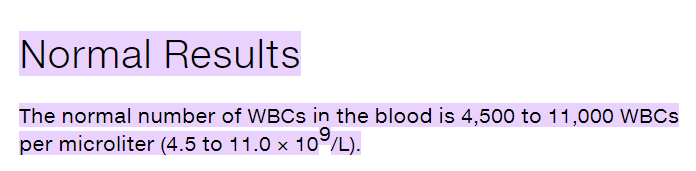

In [36]:
def interpret_WBC(WBC_value):
    if WBC_value < 4.5:
        return 'Low'
    elif 4.5 <= WBC_value <= 11:
        return 'Normal'
    else:
        return 'High'

# Add a new column 'albumin_level' based on 'L11-Albumin' values
df_selected['WBC'] = df_selected['L14-WBC'].apply(interpret_WBC)

###Platelet

https://www.ucsfhealth.org/medical-tests/platelet-count

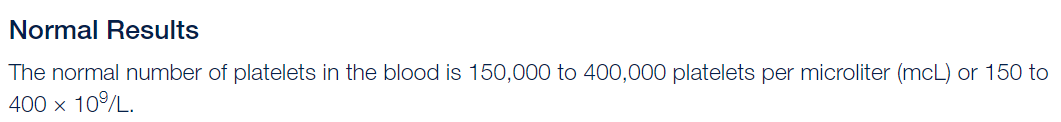

In [37]:
def interpret_Platelet(Platelet_value):
    if Platelet_value < 150:
        return 'Low'
    elif 150 <= Platelet_value <= 400:
        return 'Normal'
    else:
        return 'High'

df_selected['Platelet'] = df_selected['L15-Platelet'].apply(interpret_Platelet)

###Blood-sugar

https://www.mountsinai.org/health-library/tests/blood-sugar-test-blood

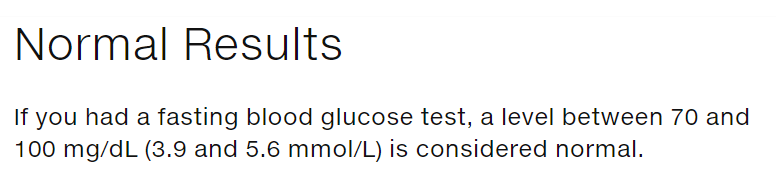

In [38]:
def interpret_BloodSugar(BloodSugar_value):
    if BloodSugar_value < 70:
        return 'Low'
    elif 70 <= BloodSugar_value <= 100:
        return 'Normal'
    else:
        return 'High'

df_selected['Blood-sugar'] = df_selected['L19-Blood-sugar'].apply(interpret_BloodSugar)

###HbA1c

https://medlineplus.gov/lab-tests/hemoglobin-a1c-hba1c-test/#:~:text=To%20diagnose%20diabetes%20or%20prediabetes,A1C%20of%206.5%25%20or%20higher

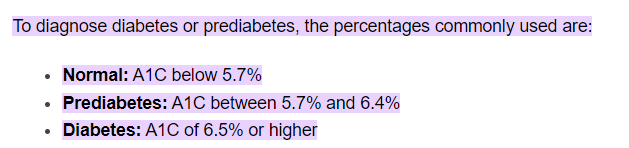

In [39]:
def interpret_HbA1c(HbA1c_value):
    if HbA1c_value < 5.7:
        return 'Normal'
    elif 5.7 <= HbA1c_value <= 6.4:
        return 'Prediabetesl'
    else:
        return 'Diabetes'

df_selected['HbA1c'] = df_selected['L20-HbA1c'].apply(interpret_HbA1c)

###Cholesterol

https://medlineplus.gov/lab-tests/cholesterol-levels/

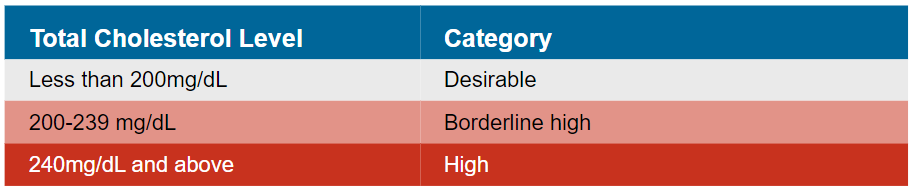

In [40]:
def interpret_Cholesterol(Cholesterol_value):
    if Cholesterol_value < 200:
        return 'Desirable'
    elif 200 <= Cholesterol_value <= 239:
        return 'Borderline high'
    else:
        return 'High'

df_selected['Cholesterol'] = df_selected['L21-Cholesterol'].apply(interpret_Cholesterol)

###Triglyceride

https://medlineplus.gov/lab-tests/triglycerides-test/

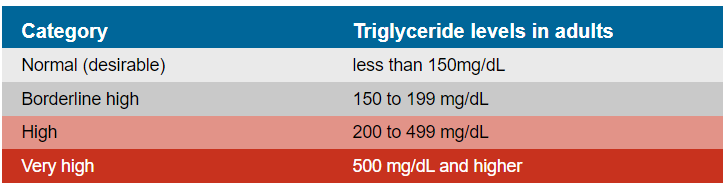

In [41]:
def interpret_Triglyceride(Triglyceride_value):
    if Triglyceride_value < 150:
        return 'Normal'
    elif 150 <= Triglyceride_value <= 199:
        return 'Borderline high'
    elif 200 <= Triglyceride_value <= 499:
        return 'High'
    else:
        return 'Very high'

df_selected['Triglyceride'] = df_selected['L22-Triglyceride'].apply(interpret_Triglyceride)

###LDL-Cholesterol

https://medlineplus.gov/lab-tests/cholesterol-levels/

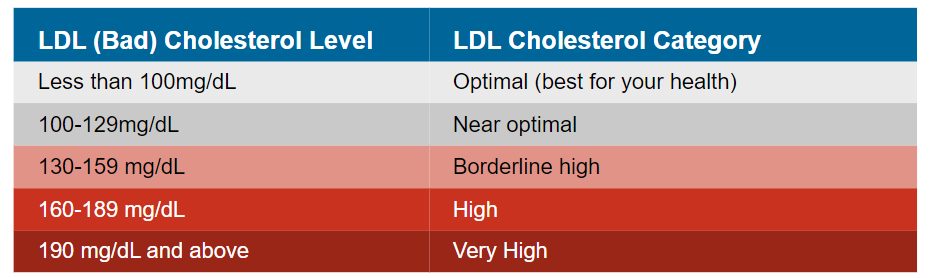

In [42]:
def interpret_LDL(LDL_value):
    if LDL_value < 100:
        return 'Optimal'
    elif 100 <= LDL_value <= 129:
        return 'Near Optimal'
    elif 130 <= LDL_value <= 159:
        return 'Borderline High'
    elif 160 <= LDL_value <= 189:
        return 'High'
    else:
        return 'Very High'

df_selected['LDL-Cholesterol'] = df_selected['L23-LDL-Cholesterol'].apply(interpret_LDL)

###HDL-Cholesterol


https://my.clevelandclinic.org/health/articles/11920-cholesterol-numbers-what-do-they-mean

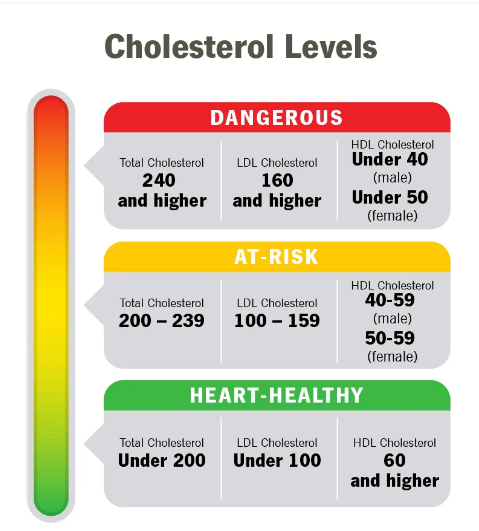

In [43]:
df_selected['L24-HDL-Cholesterol'].describe()

count    52620.000000
mean        52.145962
std         12.711384
min         20.000000
25%         44.000000
50%         50.000000
75%         59.780000
max        196.000000
Name: L24-HDL-Cholesterol, dtype: float64

In [44]:
def interpret_HDL_by_sex(HDL_value, sex):
    if sex == 0:  # Male
        if HDL_value < 40:
            return 'Dangerous'
        elif 40 <= HDL_value <= 59:
            return 'AT-Risk'
        else:
            return 'Heart-Healthy'
    elif sex == 1:  # Female
        if HDL_value <50:
            return 'Dangerous'
        elif 50<= HDL_value < 59:
            return 'AT-Risk'
        else:
            return 'Heart-Healthy'

df_selected['HDL-Cholesterol'] = df_selected.apply(lambda row: interpret_HDL_by_sex(row['L24-HDL-Cholesterol'], row['Sex']), axis=1)

###UrineProtein-Cr-ratio

https://www.healthline.com/health/kidney-disease/urine-protein-creatinine-ratio#levels

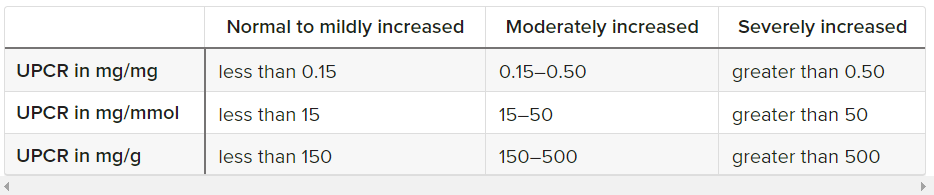

In [45]:
df_selected['L28-UrineProtein-Cr-ratio'].describe()

count    52620.000000
mean        88.277345
std         58.046303
min          0.000000
25%         39.822000
50%         76.425000
75%        125.958250
max        499.000000
Name: L28-UrineProtein-Cr-ratio, dtype: float64

In [46]:
def interpret_UPCR(UPCR_value):
    if UPCR_value < 150:
        return 'Normal'
    elif 150 <= UPCR_value <= 500:
        return 'Moderately'
    else:
        return 'Severely'

df_selected['UPCR'] = df_selected['L28-UrineProtein-Cr-ratio'].apply(interpret_UPCR)

### drug groups

In [47]:
drug = ['G1M2-ARB', 'G3M1-Statin',
       'G5M2-NSAIDs', 'G1M5-Diuretic', 'G1M7-Beta-blocker',
       'G1M3-Dihydropyridine-CCB', 'G1M6-MRA', 'G1M1-ACEI', 'G2M2-Metformin',
       'G2M3-DPP4-inhibitor', 'G2M1-SU', 'G3M3-Fibrate', 'G2M5-SGLT2i',
       'G4M1-Allopurinol', 'G1M9-Vasodilator', 'G1M8-Alpha-blocker',
       'G2M6-Insulin', 'G2M4-TZD', 'G4M2-Febuxostat', 'G3M2-Ezetimibe',
       'G1M4-Non-dihydropyridine-CCB', 'G5M1-Ketoanalog-amino-acid',
       'G2M7-GLP1-RA', 'G4M3-Uricosuric-agent']
drug = df[drug]

In [48]:
drug.head()

,G1M2-ARB,G3M1-Statin,G5M2-NSAIDs,G1M5-Diuretic,G1M7-Beta-blocker,G1M3-Dihydropyridine-CCB,G1M6-MRA,G1M1-ACEI,G2M2-Metformin,G2M3-DPP4-inhibitor,...,G1M9-Vasodilator,G1M8-Alpha-blocker,G2M6-Insulin,G2M4-TZD,G4M2-Febuxostat,G3M2-Ezetimibe,G1M4-Non-dihydropyridine-CCB,G5M1-Ketoanalog-amino-acid,G2M7-GLP1-RA,G4M3-Uricosuric-agent
0,90,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,90,90,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,100,100,34,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,35,0,1,35,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,100,0,15,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
drug.describe()

,G1M2-ARB,G3M1-Statin,G5M2-NSAIDs,G1M5-Diuretic,G1M7-Beta-blocker,G1M3-Dihydropyridine-CCB,G1M6-MRA,G1M1-ACEI,G2M2-Metformin,G2M3-DPP4-inhibitor,...,G1M9-Vasodilator,G1M8-Alpha-blocker,G2M6-Insulin,G2M4-TZD,G4M2-Febuxostat,G3M2-Ezetimibe,G1M4-Non-dihydropyridine-CCB,G5M1-Ketoanalog-amino-acid,G2M7-GLP1-RA,G4M3-Uricosuric-agent
count,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,...,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.0,52620.000000
mean,8.887628,30.067104,1.047681,2.593330,8.862657,9.167389,0.683390,6.630274,13.154257,4.558723,...,3.167256,4.171532,0.394755,2.850171,0.258989,1.769707,1.772995,0.333694,0.0,0.109787
std,27.112374,43.033413,8.089661,14.695136,26.546391,27.310031,7.339541,23.274212,32.222202,20.356311,...,16.323534,18.723921,5.260395,16.281224,4.904211,12.888611,12.106452,5.319310,0.0,3.215718
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
75%,0.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
max,365.000000,400.000000,200.000000,252.000000,285.000000,210.000000,195.000000,240.000000,315.000000,271.000000,...,210.000000,210.000000,210.000000,240.000000,119.000000,200.000000,210.000000,105.000000,0.0,180.000000


In [50]:
pd.DataFrame({
    'feature': drug.columns.values,
    'n_unique': drug.nunique().values, # ค่าไม่ซ้ำ
    'sample_unique': [drug[col].unique() for col in drug.columns]}
).round(3).reset_index(drop=True)

,feature,n_unique,sample_unique
0,G1M2-ARB,103,"[90, 100, 35, 0, 105, 210, 104, 42, 20, 60, 25..."
1,G3M1-Statin,154,"[0, 90, 100, 105, 42, 147, 1, 104, 85, 210, 60..."
2,G5M2-NSAIDs,63,"[0, 34, 1, 15, 14, 90, 40, 20, 3, 24, 5, 30, 7..."
3,G1M5-Diuretic,95,"[0, 35, 100, 105, 85, 24, 30, 1, 90, 60, 42, 1..."
4,G1M7-Beta-blocker,126,"[0, 90, 105, 100, 104, 85, 42, 92, 40, 18, 95,..."
5,G1M3-Dihydropyridine-CCB,107,"[0, 90, 105, 100, 210, 45, 42, 20, 95, 60, 71,..."
6,G1M6-MRA,62,"[0, 30, 16, 60, 17, 105, 80, 12, 42, 100, 90, ..."
7,G1M1-ACEI,102,"[0, 100, 90, 1, 12, 14, 105, 60, 40, 56, 30, 6..."
8,G2M2-Metformin,132,"[0, 100, 90, 1, 105, 85, 60, 4, 18, 56, 104, 4..."
9,G2M3-DPP4-inhibitor,75,"[0, 90, 6, 100, 104, 84, 105, 60, 42, 91, 95, ..."


In [51]:
import pandas as pd

# คอลัมน์ของยาทั้งหมด
drug_columns  = ['G1M2-ARB', 'G3M1-Statin',
       'G5M2-NSAIDs', 'G1M5-Diuretic', 'G1M7-Beta-blocker',
       'G1M3-Dihydropyridine-CCB', 'G1M6-MRA', 'G1M1-ACEI', 'G2M2-Metformin',
       'G2M3-DPP4-inhibitor', 'G2M1-SU', 'G3M3-Fibrate', 'G2M5-SGLT2i',
       'G4M1-Allopurinol', 'G1M9-Vasodilator', 'G1M8-Alpha-blocker',
       'G2M6-Insulin', 'G2M4-TZD', 'G4M2-Febuxostat', 'G3M2-Ezetimibe',
       'G1M4-Non-dihydropyridine-CCB', 'G5M1-Ketoanalog-amino-acid',
       'G2M7-GLP1-RA', 'G4M3-Uricosuric-agent']

# สร้างคอลัมน์ใหม่สำหรับแต่ละยาที่ระบุว่าคนไข้กินหรือไม่กิน
for col in drug_columns:
   df_selected[col + '_taken'] = (df_selected[col] > 0).astype(int)

In [52]:
df_selected[['G1M2-ARB','G1M2-ARB_taken','G3M1-Statin', 'G3M1-Statin_taken',
       'G5M2-NSAIDs','G1M5-Diuretic','G5M2-NSAIDs_taken','G1M5-Diuretic', 'G1M5-Diuretic_taken']].head()

,G1M2-ARB,G1M2-ARB_taken,G3M1-Statin,G3M1-Statin_taken,G5M2-NSAIDs,G1M5-Diuretic,G5M2-NSAIDs_taken,G1M5-Diuretic,G1M5-Diuretic_taken
0,90,1,0,0,0,0,0,0,0
1,90,1,90,1,0,0,0,0,0
2,100,1,100,1,34,0,1,0,0
3,35,1,0,0,1,35,1,35,1
4,100,1,0,0,15,0,1,0,0


### diag groups

In [53]:
diag = ['D1-Hypertension',
       'D2-Diabetes-mellitus', 'D3-Dyslipidemia', 'D4-SLE',
       'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis', 'D7-HIV-infection',
       'D8-HBV-infection', 'D9-HCV-infection', 'D10-Ischemic-heart-disease',
       'D11-Heart-failure', 'D12-Thalassemia', 'D13-Kidney-stone',
       'D14-Valvular-heart-disease', 'D15-Solid-malignancy',
       'D16-Hematologic-malignancy']
diag = df[diag]

In [54]:
diag.head()

,D1-Hypertension,D2-Diabetes-mellitus,D3-Dyslipidemia,D4-SLE,D5-Systemic-sclerosis,D6-Rheumatoid-arthritis,D7-HIV-infection,D8-HBV-infection,D9-HCV-infection,D10-Ischemic-heart-disease,D11-Heart-failure,D12-Thalassemia,D13-Kidney-stone,D14-Valvular-heart-disease,D15-Solid-malignancy,D16-Hematologic-malignancy
0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [55]:
diag.describe()

,D1-Hypertension,D2-Diabetes-mellitus,D3-Dyslipidemia,D4-SLE,D5-Systemic-sclerosis,D6-Rheumatoid-arthritis,D7-HIV-infection,D8-HBV-infection,D9-HCV-infection,D10-Ischemic-heart-disease,D11-Heart-failure,D12-Thalassemia,D13-Kidney-stone,D14-Valvular-heart-disease,D15-Solid-malignancy,D16-Hematologic-malignancy
count,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000
mean,0.273831,0.226606,0.196769,0.009502,0.004371,0.016838,0.002471,0.007982,0.009977,0.014994,0.005530,0.001558,0.020334,0.008837,0.043843,0.013208
std,0.528612,0.471462,0.402926,0.099529,0.066257,0.131874,0.049644,0.089410,0.099387,0.122621,0.075431,0.039445,0.144075,0.094197,0.209699,0.114664
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,6.000000,7.000000,3.000000,2.000000,5.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,3.000000,2.000000,2.000000,2.000000


In [56]:
pd.DataFrame({
    'feature': diag.columns.values,
    'n_unique': diag.nunique().values, # ค่าไม่ซ้ำ
    'sample_unique': [diag[col].unique() for col in diag.columns]}
).round(3).reset_index(drop=True)

,feature,n_unique,sample_unique
0,D1-Hypertension,5,"[0, 1, 2, 3, 4]"
1,D2-Diabetes-mellitus,6,"[2, 1, 0, 3, 4, 6]"
2,D3-Dyslipidemia,5,"[0, 1, 2, 3, 7]"
3,D4-SLE,4,"[0, 1, 2, 3]"
4,D5-Systemic-sclerosis,3,"[0, 1, 2]"
5,D6-Rheumatoid-arthritis,5,"[0, 1, 2, 5, 3]"
6,D7-HIV-infection,2,"[0, 1]"
7,D8-HBV-infection,3,"[0, 1, 2]"
8,D9-HCV-infection,2,"[0, 1]"
9,D10-Ischemic-heart-disease,3,"[0, 1, 2]"


In [57]:
# คอลัมน์ของการตรวจสุขภาพทั้งหมด
diag_columns = ['D1-Hypertension',
       'D2-Diabetes-mellitus', 'D3-Dyslipidemia', 'D4-SLE',
       'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis', 'D7-HIV-infection',
       'D8-HBV-infection', 'D9-HCV-infection', 'D10-Ischemic-heart-disease',
       'D11-Heart-failure', 'D12-Thalassemia', 'D13-Kidney-stone',
       'D14-Valvular-heart-disease', 'D15-Solid-malignancy',
       'D16-Hematologic-malignancy']

# สร้างคอลัมน์ใหม่สำหรับแต่ละการตรวจที่ระบุว่าผู้ป่วยมีการตรวจหรือไม่มีการตรวจ
for col in diag_columns:
    df_selected[col + '_check'] = (df_selected[col] > 0).astype(int)

In [58]:
df_selected[['D1-Hypertension','D1-Hypertension_check', 'D2-Diabetes-mellitus','D2-Diabetes-mellitus_check',
             'D6-Rheumatoid-arthritis','D6-Rheumatoid-arthritis_check']].head()

,D1-Hypertension,D1-Hypertension_check,D2-Diabetes-mellitus,D2-Diabetes-mellitus_check,D6-Rheumatoid-arthritis,D6-Rheumatoid-arthritis_check
0,0,0,2,1,0,0
1,0,0,2,1,0,0
2,0,0,1,1,0,0
3,0,0,1,1,0,0
4,1,1,1,1,0,0


## Histogram


In [59]:
def get_dtype_lists(data,features):
    output = {}
    for f in features:
        dtype = str(data[f].dtype)
        if dtype not in output.keys(): output[dtype] = [f]
        else: output[dtype] += [f]
    return output

In [60]:
data = ['InPatient', 'OutPatient', 'Emergency','NATNL',
'Slopes_Category','Sex', 'Age_range', 'BMI_range','BSA_range', 'DBP', 'SBP',
'eGFR_Category', 'BUN','Sodium', 'Potassium', 'Chloride', 'Bicarbonate', 'Uric',
       'Calcium', 'Phosphorus', 'Albumin', 'Hemoglobin',
       'Hematocrit', 'WBC', 'Platelet', 'Blood-sugar',
       'HbA1c', 'Cholesterol', 'Triglyceride',
       'LDL-Cholesterol', 'HDL-Cholesterol',
       'UPCR',
'G1M2-ARB_taken', 'G3M1-Statin_taken',
       'G5M2-NSAIDs_taken', 'G1M5-Diuretic_taken', 'G1M7-Beta-blocker_taken',
       'G1M3-Dihydropyridine-CCB_taken', 'G1M6-MRA_taken', 'G1M1-ACEI_taken', 'G2M2-Metformin_taken',
       'G2M3-DPP4-inhibitor_taken', 'G2M1-SU_taken', 'G3M3-Fibrate_taken', 'G2M5-SGLT2i_taken',
       'G4M1-Allopurinol_taken', 'G1M9-Vasodilator_taken', 'G1M8-Alpha-blocker_taken',
       'G2M6-Insulin_taken', 'G2M4-TZD_taken', 'G4M2-Febuxostat_taken', 'G3M2-Ezetimibe_taken',
       'G1M4-Non-dihydropyridine-CCB_taken', 'G5M1-Ketoanalog-amino-acid_taken',
       'G2M7-GLP1-RA_taken', 'G4M3-Uricosuric-agent_taken',
'D1-Hypertension_check',
       'D2-Diabetes-mellitus_check', 'D3-Dyslipidemia_check', 'D4-SLE_check',
       'D5-Systemic-sclerosis_check', 'D6-Rheumatoid-arthritis_check', 'D7-HIV-infection_check',
       'D8-HBV-infection_check', 'D9-HCV-infection_check', 'D10-Ischemic-heart-disease_check',
       'D11-Heart-failure_check', 'D12-Thalassemia_check', 'D13-Kidney-stone_check',
       'D14-Valvular-heart-disease_check', 'D15-Solid-malignancy_check',
       'D16-Hematologic-malignancy_check']
data  = df_selected[data]

In [61]:
data.shape

(52620, 72)

In [62]:
# เปลี่ยนชื่อคอลัมน์โดยใช้ str.replace()
data.columns = data.columns.str.replace('_taken', '').str.replace('_check', '').str.replace('_Category', '').str.replace('_range', '')

In [63]:
dtype = get_dtype_lists(data, data.columns)
dtype

{'int64': ['InPatient',
  'OutPatient',
  'Emergency',
  'NATNL',
  'Sex',
  'G1M2-ARB',
  'G3M1-Statin',
  'G5M2-NSAIDs',
  'G1M5-Diuretic',
  'G1M7-Beta-blocker',
  'G1M3-Dihydropyridine-CCB',
  'G1M6-MRA',
  'G1M1-ACEI',
  'G2M2-Metformin',
  'G2M3-DPP4-inhibitor',
  'G2M1-SU',
  'G3M3-Fibrate',
  'G2M5-SGLT2i',
  'G4M1-Allopurinol',
  'G1M9-Vasodilator',
  'G1M8-Alpha-blocker',
  'G2M6-Insulin',
  'G2M4-TZD',
  'G4M2-Febuxostat',
  'G3M2-Ezetimibe',
  'G1M4-Non-dihydropyridine-CCB',
  'G5M1-Ketoanalog-amino-acid',
  'G2M7-GLP1-RA',
  'G4M3-Uricosuric-agent',
  'D1-Hypertension',
  'D2-Diabetes-mellitus',
  'D3-Dyslipidemia',
  'D4-SLE',
  'D5-Systemic-sclerosis',
  'D6-Rheumatoid-arthritis',
  'D7-HIV-infection',
  'D8-HBV-infection',
  'D9-HCV-infection',
  'D10-Ischemic-heart-disease',
  'D11-Heart-failure',
  'D12-Thalassemia',
  'D13-Kidney-stone',
  'D14-Valvular-heart-disease',
  'D15-Solid-malignancy',
  'D16-Hematologic-malignancy'],
 'object': ['Slopes',
  'BMI',
  'BSA',


In [64]:
# สร้าง mapping ของค่าที่จะแทนที่
replacement_mapping = {
    'Sex': {0: 'Male', 1: 'Female'},
    'NATNL' : {0: 'Asian', 1: 'Asian', 2: 'Other', 3: 'Other'} # 'NATNL' : {0: 'Thai', 1: 'Asian', 2: 'Caucasian', 3: 'Other'}
}

# ทำการ replace ค่าใน DataFrame
data.replace(replacement_mapping, inplace=True)

<ipython-input-64-663e8407cdb7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace(replacement_mapping, inplace=True)


In [65]:
# เช็คหน่วยความจำที่ใช้
memory_usage = data.memory_usage(deep=True)
print("Total memory usage:", memory_usage.sum(), "bytes")

Total memory usage: 105212969 bytes


In [66]:
# เลือกคอลัมน์ที่มีชนิดข้อมูลเป็น string object
string_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()

# แสดงรายชื่อคอลัมน์ที่เป็น string object
print(string_columns)

['NATNL', 'Slopes', 'Sex', 'Age', 'BMI', 'BSA', 'DBP', 'SBP', 'eGFR', 'BUN', 'Sodium', 'Potassium', 'Chloride', 'Bicarbonate', 'Uric', 'Calcium', 'Phosphorus', 'Albumin', 'Hemoglobin', 'Hematocrit', 'WBC', 'Platelet', 'Blood-sugar', 'HbA1c', 'Cholesterol', 'Triglyceride', 'LDL-Cholesterol', 'HDL-Cholesterol', 'UPCR']


In [67]:
# Assuming 'data' is your DataFrame, replace column names with your actual categorical columns
categorical_columns = ['NATNL', 'Slopes', 'Sex', 'Age', 'BMI', 'BSA', 'DBP', 'SBP', 'eGFR', 'BUN',
                                  'Sodium', 'Potassium', 'Chloride', 'Bicarbonate', 'Uric', 'Calcium', 'Phosphorus',
                                  'Albumin', 'Hemoglobin', 'Hematocrit', 'WBC', 'Platelet', 'Blood-sugar', 'HbA1c',
                                  'Cholesterol', 'Triglyceride', 'LDL-Cholesterol', 'HDL-Cholesterol', 'UPCR']
data[categorical_columns] = data[categorical_columns].astype('category') # ลดหน่วยความจำ

<ipython-input-67-715f5aa5628d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[categorical_columns] = data[categorical_columns].astype('category') # ลดหน่วยความจำ


In [68]:
# เช็คหน่วยความจำที่ใช้
memory_usage = data.memory_usage(deep=True)
print("Total memory usage:", memory_usage.sum(), "bytes")

Total memory usage: 19636337 bytes


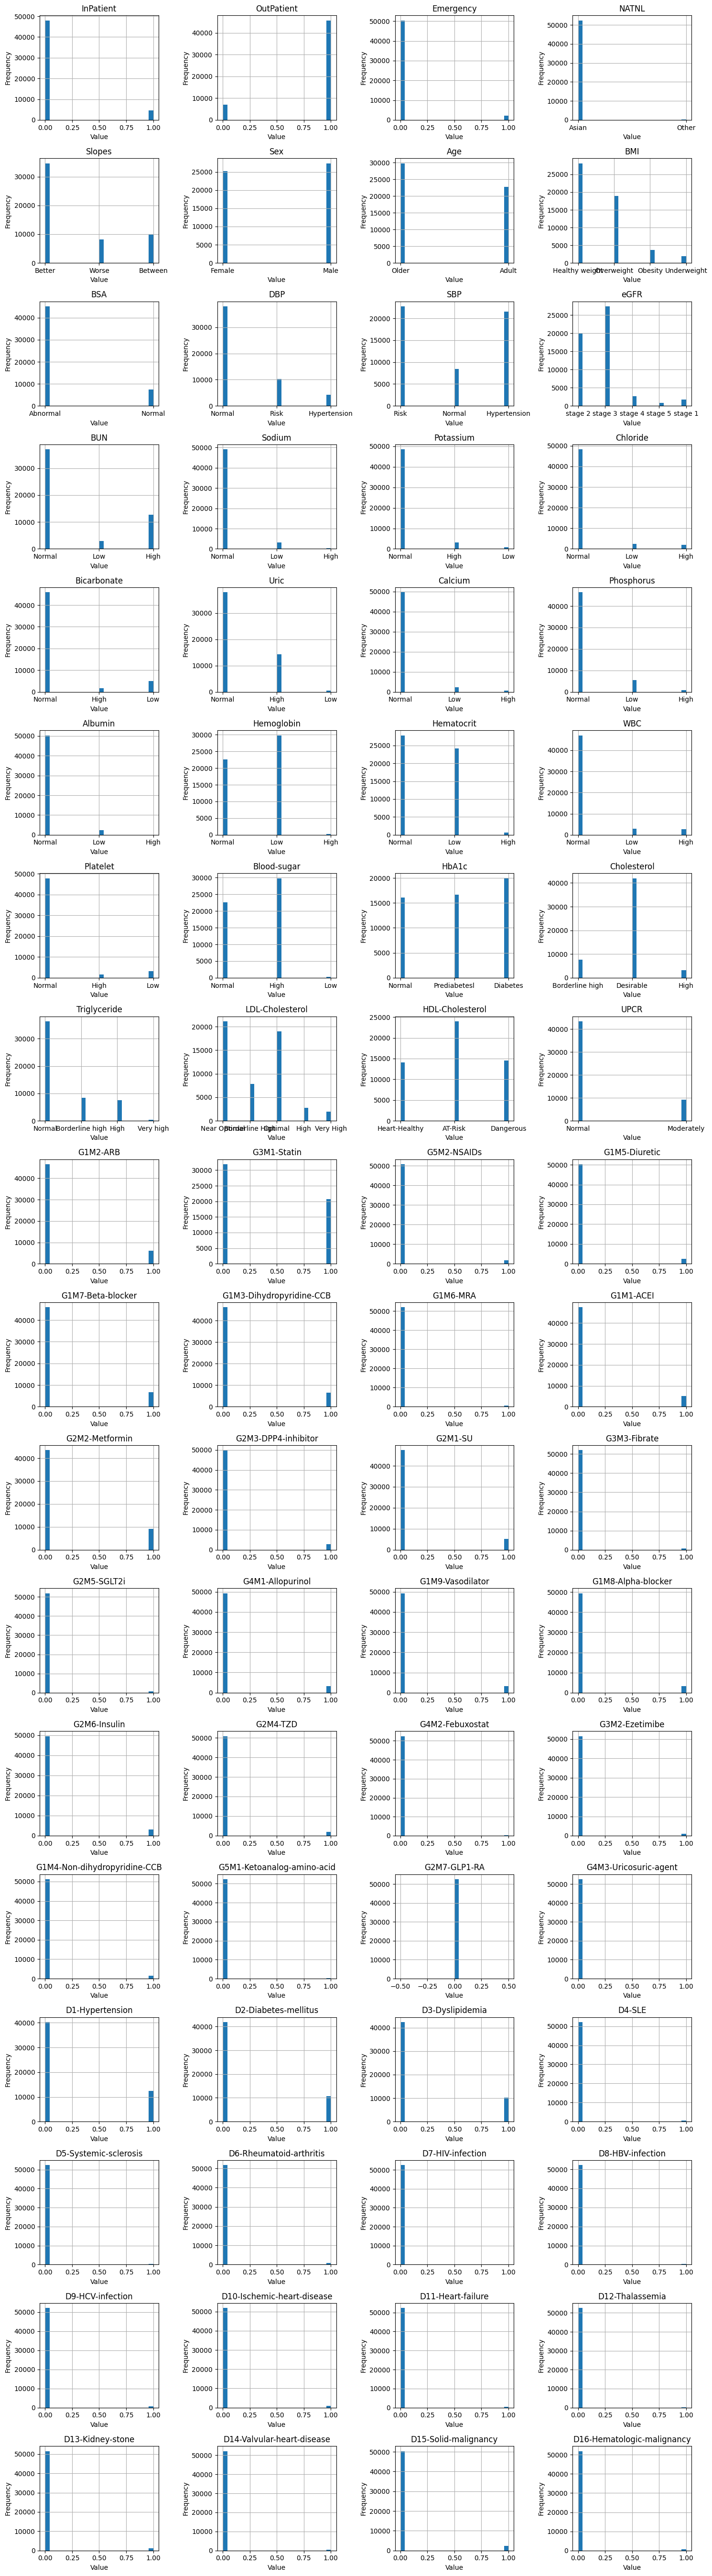

In [69]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
num_variables = len(data.columns)
num_rows = (num_variables // 4) + (num_variables % 4 > 0)
num_cols = min(num_variables, 4)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3))

# Flatten axes if necessary
axes = axes.flatten()

# Plot histogram for each variable
for i, (col, ax) in enumerate(zip(data.columns, axes)):
    data[col].hist(bins=24, ax=ax)
    ax.set_title(col)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

## Slopes

In [138]:
df_feature_slopes = data.drop(['eGFR'], axis=1)

In [139]:
# Categorical columns for one-hot encoding
df_categorical_columns = ['NATNL', 'Sex', 'Age','Slopes','BMI', 'BSA', 'DBP', 'SBP','BUN',
                                  'Sodium', 'Potassium', 'Chloride', 'Bicarbonate', 'Uric', 'Calcium', 'Phosphorus',
                                  'Albumin', 'Hemoglobin', 'Hematocrit', 'WBC', 'Platelet', 'Blood-sugar', 'HbA1c',
                                  'Cholesterol', 'Triglyceride', 'LDL-Cholesterol', 'HDL-Cholesterol', 'UPCR']
# Select categorical columns from the DataFrame
df_feature_slopes[df_categorical_columns] = df_feature_slopes[df_categorical_columns]

In [140]:
# One-hot encode categorical columns
dummy_slopes = pd.get_dummies(df_feature_slopes, columns=df_categorical_columns)
dummy_slopes.shape

(52620, 126)

In [141]:
dummy_slopes.head()

,InPatient,OutPatient,Emergency,G1M2-ARB,G3M1-Statin,G5M2-NSAIDs,G1M5-Diuretic,G1M7-Beta-blocker,G1M3-Dihydropyridine-CCB,G1M6-MRA,...,LDL-Cholesterol_Borderline High,LDL-Cholesterol_High,LDL-Cholesterol_Near Optimal,LDL-Cholesterol_Optimal,LDL-Cholesterol_Very High,HDL-Cholesterol_AT-Risk,HDL-Cholesterol_Dangerous,HDL-Cholesterol_Heart-Healthy,UPCR_Moderately,UPCR_Normal
0,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
1,0,1,0,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
2,0,1,0,1,1,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
3,0,1,0,1,0,1,1,0,0,0,...,1,0,0,0,0,0,0,1,0,1
4,0,1,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1


In [142]:
dummy_slopes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52620 entries, 0 to 52619
Columns: 126 entries, InPatient to UPCR_Normal
dtypes: int64(43), uint8(83)
memory usage: 21.4 MB


In [149]:
dummy_slopes = dummy_slopes.astype(bool)
dummy_slopes.head()

,InPatient,OutPatient,Emergency,G1M2-ARB,G3M1-Statin,G5M2-NSAIDs,G1M5-Diuretic,G1M7-Beta-blocker,G1M3-Dihydropyridine-CCB,G1M6-MRA,...,LDL-Cholesterol_Borderline High,LDL-Cholesterol_High,LDL-Cholesterol_Near Optimal,LDL-Cholesterol_Optimal,LDL-Cholesterol_Very High,HDL-Cholesterol_AT-Risk,HDL-Cholesterol_Dangerous,HDL-Cholesterol_Heart-Healthy,UPCR_Moderately,UPCR_Normal
0,False,True,False,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,True
1,False,True,False,True,True,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,True
2,False,True,False,True,True,True,False,False,False,False,...,False,False,True,False,False,False,False,True,False,True
3,False,True,False,True,False,True,True,False,False,False,...,True,False,False,False,False,False,False,True,False,True
4,False,True,False,True,False,True,False,False,False,False,...,False,False,True,False,False,False,False,True,False,True


In [150]:
dummy_slopes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52620 entries, 0 to 52619
Columns: 126 entries, InPatient to UPCR_Normal
dtypes: bool(126)
memory usage: 6.3 MB


In [151]:
#dummy_slopes.to_csv('dummy_slopes.csv')

## eGFR

In [143]:
df_feature_egfr = data.drop(['Slopes'], axis=1)

In [144]:
# Categorical columns for one-hot encoding
df_categorical_columns = ['NATNL', 'Sex', 'Age','BMI', 'BSA', 'DBP', 'SBP','eGFR','BUN',
                                  'Sodium', 'Potassium', 'Chloride', 'Bicarbonate', 'Uric', 'Calcium', 'Phosphorus',
                                  'Albumin', 'Hemoglobin', 'Hematocrit', 'WBC', 'Platelet', 'Blood-sugar', 'HbA1c',
                                  'Cholesterol', 'Triglyceride', 'LDL-Cholesterol', 'HDL-Cholesterol', 'UPCR']
# Select categorical columns from the DataFrame
df_feature_egfr[df_categorical_columns] = df_feature_egfr[df_categorical_columns]

In [145]:
# One-hot encode categorical columns
dummy_egfr = pd.get_dummies(df_feature_egfr, columns=df_categorical_columns)
dummy_egfr.shape

(52620, 128)

In [146]:
dummy_egfr.head()

,InPatient,OutPatient,Emergency,G1M2-ARB,G3M1-Statin,G5M2-NSAIDs,G1M5-Diuretic,G1M7-Beta-blocker,G1M3-Dihydropyridine-CCB,G1M6-MRA,...,LDL-Cholesterol_Borderline High,LDL-Cholesterol_High,LDL-Cholesterol_Near Optimal,LDL-Cholesterol_Optimal,LDL-Cholesterol_Very High,HDL-Cholesterol_AT-Risk,HDL-Cholesterol_Dangerous,HDL-Cholesterol_Heart-Healthy,UPCR_Moderately,UPCR_Normal
0,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
1,0,1,0,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
2,0,1,0,1,1,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
3,0,1,0,1,0,1,1,0,0,0,...,1,0,0,0,0,0,0,1,0,1
4,0,1,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1


In [147]:
dummy_egfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52620 entries, 0 to 52619
Columns: 128 entries, InPatient to UPCR_Normal
dtypes: int64(43), uint8(85)
memory usage: 21.5 MB


In [152]:
dummy_egfr = dummy_egfr.astype(bool)
dummy_egfr.head()

,InPatient,OutPatient,Emergency,G1M2-ARB,G3M1-Statin,G5M2-NSAIDs,G1M5-Diuretic,G1M7-Beta-blocker,G1M3-Dihydropyridine-CCB,G1M6-MRA,...,LDL-Cholesterol_Borderline High,LDL-Cholesterol_High,LDL-Cholesterol_Near Optimal,LDL-Cholesterol_Optimal,LDL-Cholesterol_Very High,HDL-Cholesterol_AT-Risk,HDL-Cholesterol_Dangerous,HDL-Cholesterol_Heart-Healthy,UPCR_Moderately,UPCR_Normal
0,False,True,False,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,True
1,False,True,False,True,True,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,True
2,False,True,False,True,True,True,False,False,False,False,...,False,False,True,False,False,False,False,True,False,True
3,False,True,False,True,False,True,True,False,False,False,...,True,False,False,False,False,False,False,True,False,True
4,False,True,False,True,False,True,False,False,False,False,...,False,False,True,False,False,False,False,True,False,True


In [153]:
dummy_egfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52620 entries, 0 to 52619
Columns: 128 entries, InPatient to UPCR_Normal
dtypes: bool(128)
memory usage: 6.4 MB


In [154]:
#dummy_egfr.to_csv('dummy_egfr.csv')

In [ ]:
frequent_items = apriori(df, use_colnames=True, min_support=min_support, max_len=max_len + 1)

## SMOTE for Imbalanced Classification

###Binary Classification

ต้องทำทีละตัวแปร ถ้าไม่อย่างนั้นมันจะเกิดการทับซ้อนกัน

#### Slope worse

In [161]:
data.shape

(52620, 72)

In [162]:
# One-hot encode categorical columns
dummy_data = pd.get_dummies(data, columns=categorical_columns)
dummy_data.shape

(52620, 131)

In [76]:
# Find column names in dummy_data that start with "slope"
slope_columns = [col for col in dummy_data.columns if col.startswith('Slopes')]

# Display the found columns
print(slope_columns)

['Slopes_Better', 'Slopes_Between', 'Slopes_Worse']


In [77]:
df_target_slopes_worse = dummy_data['Slopes_Worse']
df_feature_slopes_worse = dummy_data.drop(['Slopes_Worse','eGFR_stage 1', 'eGFR_stage 2', 'eGFR_stage 3', 'eGFR_stage 4', 'eGFR_stage 5'], axis=1)

In [78]:
from imblearn.over_sampling import SMOTE
# transform the dataset
oversample_slopes = SMOTE()
X_resampled_slopes_worse, y_resampled_slopes_worse = oversample_slopes.fit_resample(df_feature_slopes_worse, df_target_slopes_worse)

In [79]:
# Convert the resampled data to DataFrames for 'Slopes'
df_resampled_slopes_worse = pd.DataFrame(X_resampled_slopes_worse, columns=df_feature_slopes_worse.columns)
df_resampled_slopes_worse['Slopes_Worse'] = y_resampled_slopes_worse

<ipython-input-79-a381e215041a>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_resampled_slopes_worse['Slopes_Worse'] = y_resampled_slopes_worse


In [80]:
df_resampled_slopes_worse.head()

,InPatient,OutPatient,Emergency,G1M2-ARB,G3M1-Statin,G5M2-NSAIDs,G1M5-Diuretic,G1M7-Beta-blocker,G1M3-Dihydropyridine-CCB,G1M6-MRA,...,LDL-Cholesterol_High,LDL-Cholesterol_Near Optimal,LDL-Cholesterol_Optimal,LDL-Cholesterol_Very High,HDL-Cholesterol_AT-Risk,HDL-Cholesterol_Dangerous,HDL-Cholesterol_Heart-Healthy,UPCR_Moderately,UPCR_Normal,Slopes_Worse
0,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
1,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1
2,0,1,0,1,1,1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
3,0,1,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,0,1,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,1


In [81]:
#df_resampled_slopes_worse.to_csv('try_1.csv')

In [82]:
slope_test = df_resampled_slopes_worse[['Slopes_Between', 'Slopes_Worse', 'Slopes_Better']]
slope_test

,Slopes_Between,Slopes_Worse,Slopes_Better
0,0,0,1
1,0,1,0
2,0,0,1
3,0,0,1
4,0,1,0
...,...,...,...
88823,0,1,0
88824,0,1,0
88825,0,1,0
88826,0,1,0


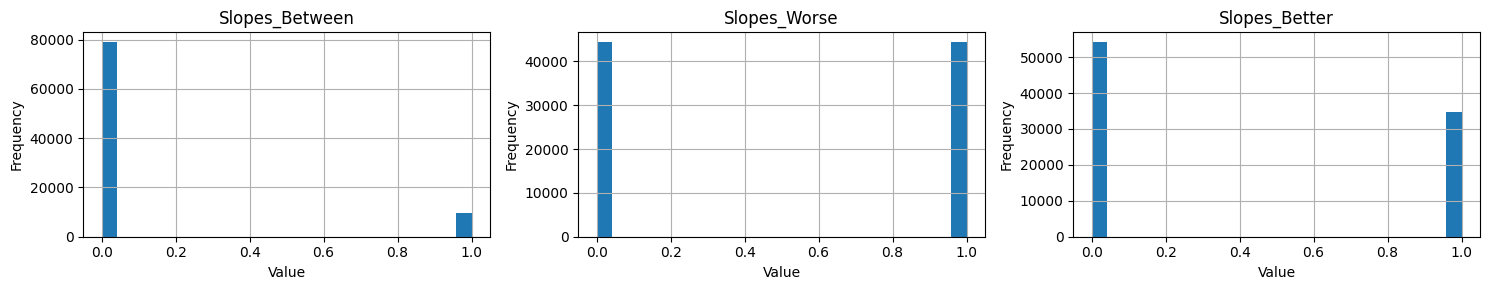

In [83]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
num_variables = len(slope_test.columns)
num_rows = (num_variables // 4) + (num_variables % 4 > 0)
num_cols = min(num_variables, 4)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3))

# Flatten axes if necessary
axes = axes.flatten()

# Plot histogram for each variable
for i, (col, ax) in enumerate(zip(slope_test.columns, axes)):
    slope_test[col].hist(bins=24, ax=ax)
    ax.set_title(col)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

In [84]:
df_resampled_slopes_worse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88828 entries, 0 to 88827
Columns: 126 entries, InPatient to Slopes_Worse
dtypes: int64(43), uint8(83)
memory usage: 36.2 MB


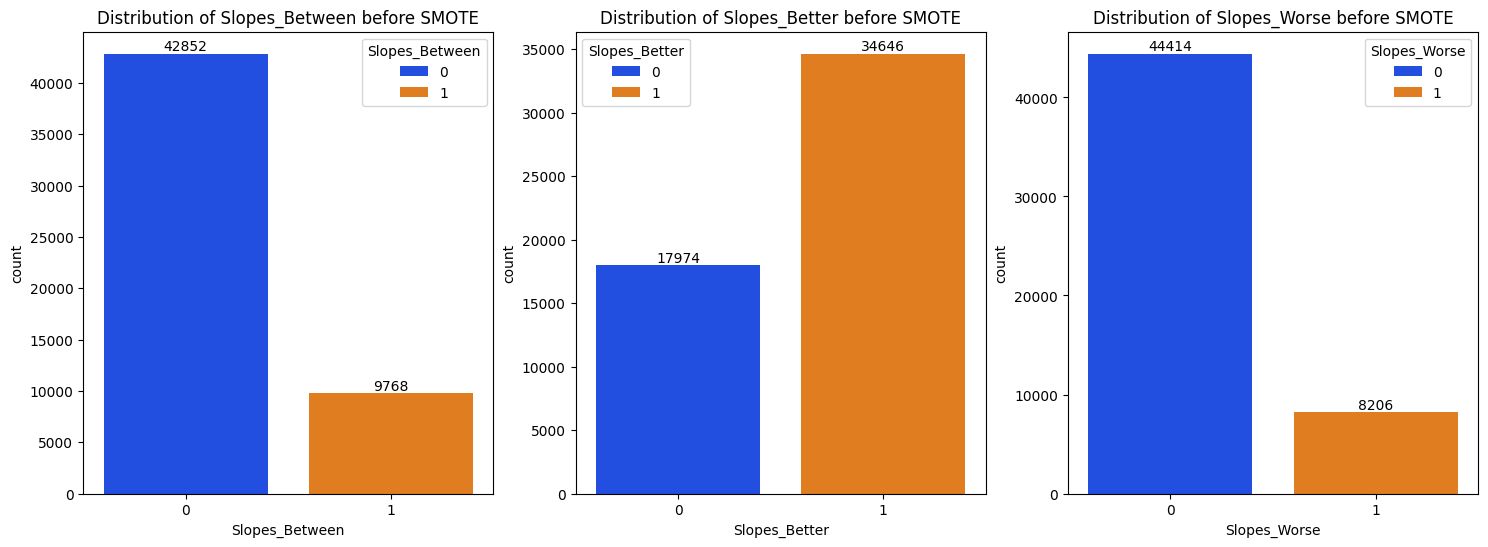

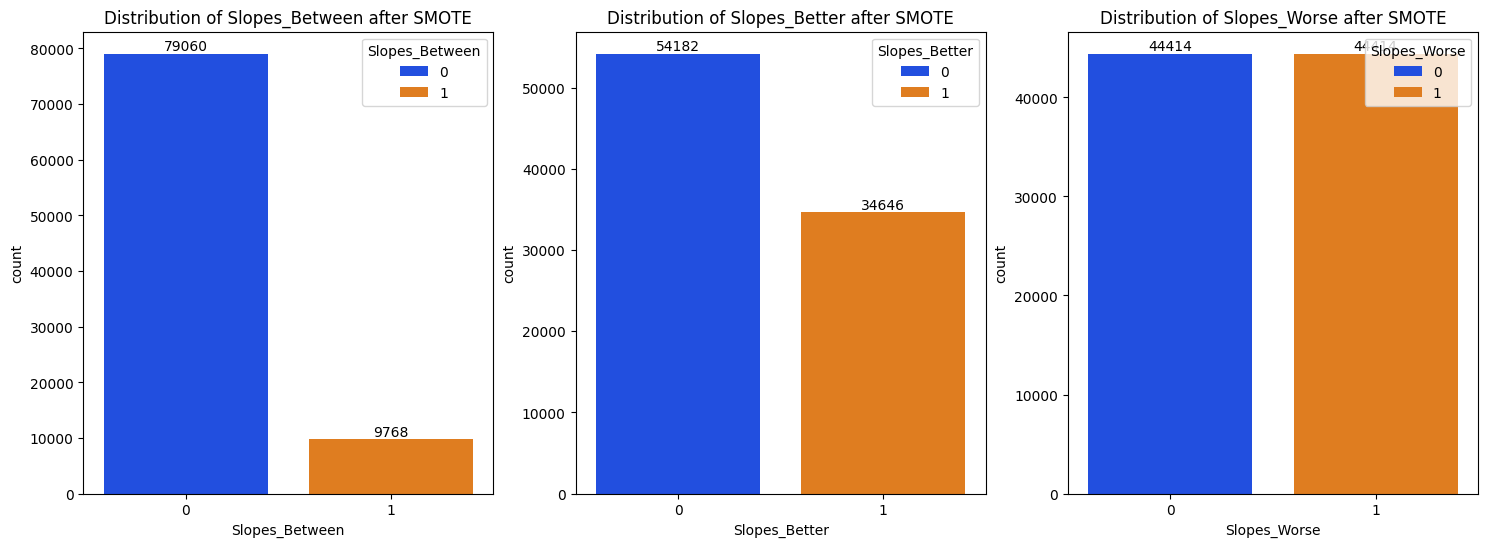

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution before SMOTE
plt.figure(figsize=(18, 6))

# Plot distribution before SMOTE - Slopes_Between
plt.subplot(1, 3, 1)
g0_before_between = sns.countplot(dummy_data, x='Slopes_Between', hue='Slopes_Between', palette='bright', dodge=False)
g0_before_between.bar_label(g0_before_between.containers[0])
g0_before_between.bar_label(g0_before_between.containers[1])
plt.title('Distribution of Slopes_Between before SMOTE')

# Plot distribution before SMOTE - Slopes_Stable_and_better
plt.subplot(1, 3, 2)
g0_before_stable = sns.countplot(dummy_data, x='Slopes_Better', hue='Slopes_Better', palette='bright', dodge=False)
g0_before_stable.bar_label(g0_before_stable.containers[0])
g0_before_stable.bar_label(g0_before_stable.containers[1])
plt.title('Distribution of Slopes_Better before SMOTE')

# Plot distribution before SMOTE - Slopes_Worse
plt.subplot(1, 3, 3)
g0_before_worse = sns.countplot(dummy_data, x='Slopes_Worse', hue='Slopes_Worse', palette='bright', dodge=False)
g0_before_worse.bar_label(g0_before_worse.containers[0])
g0_before_worse.bar_label(g0_before_worse.containers[1])
plt.title('Distribution of Slopes_Worse before SMOTE')

plt.show()

# Plot distribution after SMOTE
plt.figure(figsize=(18, 6))

# Plot distribution after SMOTE - Slopes_Between
plt.subplot(1, 3, 1)
g0_after_between = sns.countplot(df_resampled_slopes_worse, x='Slopes_Between', hue='Slopes_Between', palette='bright', dodge=False)
g0_after_between.bar_label(g0_after_between.containers[0])
g0_after_between.bar_label(g0_after_between.containers[1])
plt.title('Distribution of Slopes_Between after SMOTE')

# Plot distribution after SMOTE - Slopes_Stable_and_better
plt.subplot(1, 3, 2)
g0_after_stable = sns.countplot(df_resampled_slopes_worse, x='Slopes_Better', hue='Slopes_Better', palette='bright', dodge=False)
g0_after_stable.bar_label(g0_after_stable.containers[0])
g0_after_stable.bar_label(g0_after_stable.containers[1])
plt.title('Distribution of Slopes_Better after SMOTE')

# Plot distribution after SMOTE - Slopes_Worse
plt.subplot(1, 3, 3)
g0_after_worse = sns.countplot(df_resampled_slopes_worse, x='Slopes_Worse', hue='Slopes_Worse', palette='bright', dodge=False)
g0_after_worse.bar_label(g0_after_worse.containers[0])
g0_after_worse.bar_label(g0_after_worse.containers[1])
plt.title('Distribution of Slopes_Worse after SMOTE')

plt.show()

In [86]:
resampled_slopes_worse = df_resampled_slopes_worse.astype(bool) #df_resampled_slopes_worse
resampled_slopes_worse.head()

,InPatient,OutPatient,Emergency,G1M2-ARB,G3M1-Statin,G5M2-NSAIDs,G1M5-Diuretic,G1M7-Beta-blocker,G1M3-Dihydropyridine-CCB,G1M6-MRA,...,LDL-Cholesterol_High,LDL-Cholesterol_Near Optimal,LDL-Cholesterol_Optimal,LDL-Cholesterol_Very High,HDL-Cholesterol_AT-Risk,HDL-Cholesterol_Dangerous,HDL-Cholesterol_Heart-Healthy,UPCR_Moderately,UPCR_Normal,Slopes_Worse
0,False,True,False,True,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,True,False
1,False,True,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,True
2,False,True,False,True,True,True,False,False,False,False,...,False,True,False,False,False,False,True,False,True,False
3,False,True,False,True,False,True,True,False,False,False,...,False,False,False,False,False,False,True,False,True,False
4,False,True,False,True,False,True,False,False,False,False,...,False,True,False,False,False,False,True,False,True,True


In [87]:
resampled_slopes_worse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88828 entries, 0 to 88827
Columns: 126 entries, InPatient to Slopes_Worse
dtypes: bool(126)
memory usage: 10.7 MB


In [88]:
#resampled_slopes_worse.to_csv('resampled_slopes_worse.csv')

#### eGFR_stage_4

In [163]:
# Find column names in dummy_data that start with "eGFR"
egfr_columns = [col for col in dummy_data.columns if col.startswith('eGFR')]

# Display the found columns
print(egfr_columns)

['eGFR_stage 1', 'eGFR_stage 2', 'eGFR_stage 3', 'eGFR_stage 4', 'eGFR_stage 5']


In [164]:
df_target_eGFR_stage_4 = dummy_data['eGFR_stage 4']
df_feature_eGFR_stage_4 = dummy_data.drop(['eGFR_stage 4','Slopes_Better', 'Slopes_Between', 'Slopes_Worse'], axis=1)

In [165]:
from imblearn.over_sampling import SMOTE
# transform the dataset
oversample_egfr = SMOTE()
X_resampled_egfr_4, y_resampled_egfr_4 = oversample_egfr.fit_resample(df_feature_eGFR_stage_4, df_target_eGFR_stage_4)

In [166]:
# Convert the resampled data to DataFrames for 'Slopes'
df_resampled_egfr_4 = pd.DataFrame(X_resampled_egfr_4, columns=df_feature_eGFR_stage_4.columns)
df_resampled_egfr_4['eGFR_stage_4'] = y_resampled_egfr_4

<ipython-input-166-9c04a8e2700d>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_resampled_egfr_4['eGFR_stage_4'] = y_resampled_egfr_4


In [167]:
df_resampled_egfr_4.head()

,InPatient,OutPatient,Emergency,G1M2-ARB,G3M1-Statin,G5M2-NSAIDs,G1M5-Diuretic,G1M7-Beta-blocker,G1M3-Dihydropyridine-CCB,G1M6-MRA,...,LDL-Cholesterol_High,LDL-Cholesterol_Near Optimal,LDL-Cholesterol_Optimal,LDL-Cholesterol_Very High,HDL-Cholesterol_AT-Risk,HDL-Cholesterol_Dangerous,HDL-Cholesterol_Heart-Healthy,UPCR_Moderately,UPCR_Normal,eGFR_stage_4
0,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
1,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,1,0,1,1,1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
3,0,1,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,0,1,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0


In [169]:
egfr_test = df_resampled_egfr_4[['eGFR_stage 1', 'eGFR_stage 2', 'eGFR_stage 3', 'eGFR_stage_4', 'eGFR_stage 5']]
egfr_test

,eGFR_stage 1,eGFR_stage 2,eGFR_stage 3,eGFR_stage_4,eGFR_stage 5
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,0,1,0,0
...,...,...,...,...,...
99867,0,0,0,1,0
99868,0,0,0,1,0
99869,0,0,0,1,0
99870,0,0,0,1,0


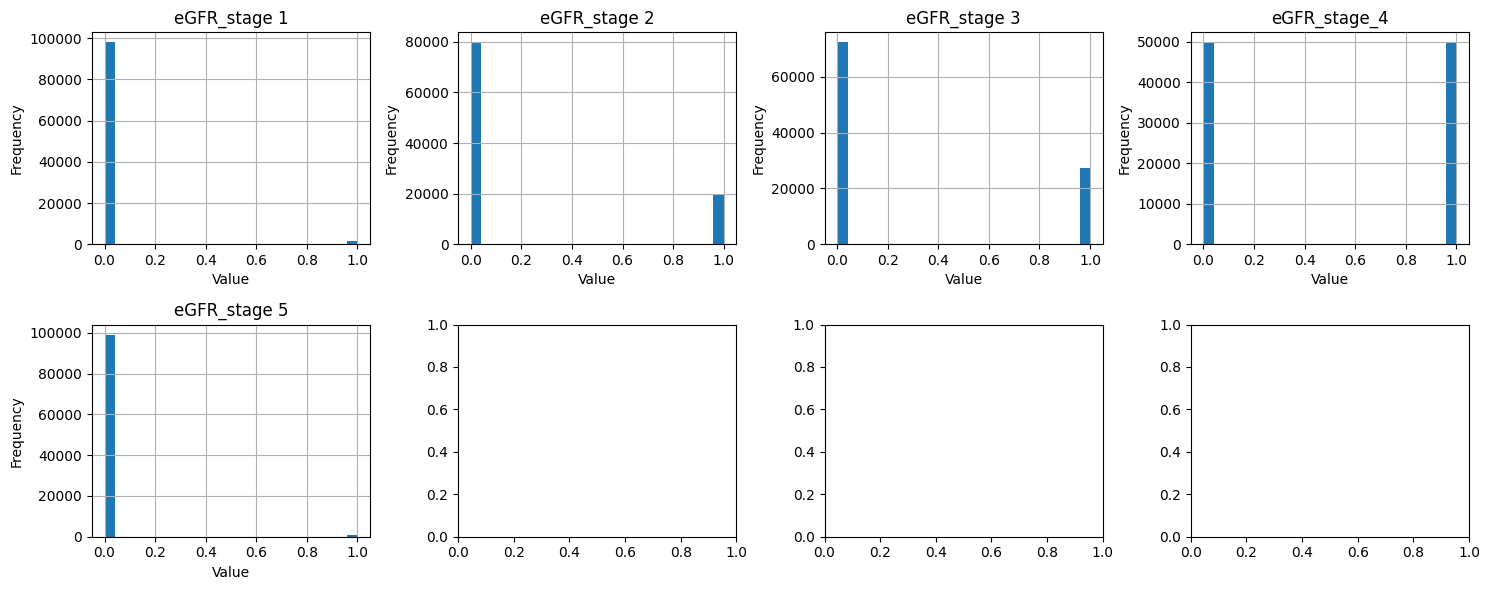

In [170]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
num_variables = len(egfr_test.columns)
num_rows = (num_variables // 4) + (num_variables % 4 > 0)
num_cols = min(num_variables, 4)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3))

# Flatten axes if necessary
axes = axes.flatten()

# Plot histogram for each variable
for i, (col, ax) in enumerate(zip(egfr_test.columns, axes)):
    egfr_test[col].hist(bins=24, ax=ax)
    ax.set_title(col)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

In [171]:
df_resampled_egfr_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99872 entries, 0 to 99871
Columns: 128 entries, InPatient to eGFR_stage_4
dtypes: int64(43), uint8(85)
memory usage: 40.9 MB


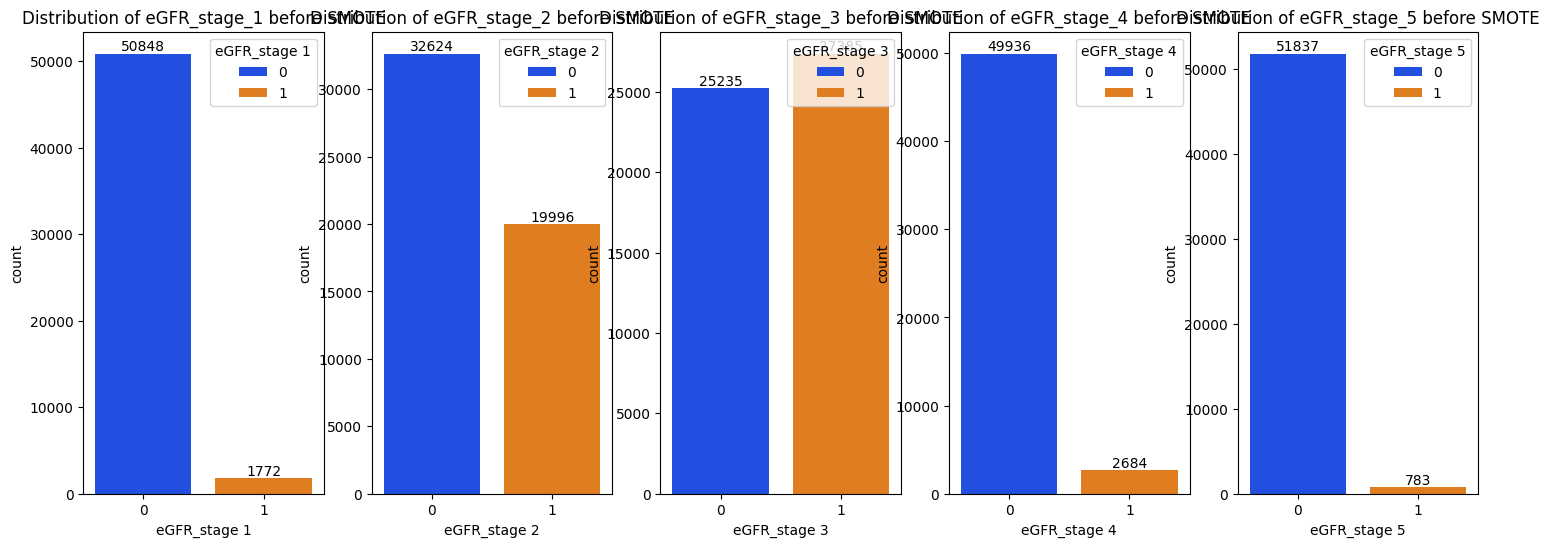

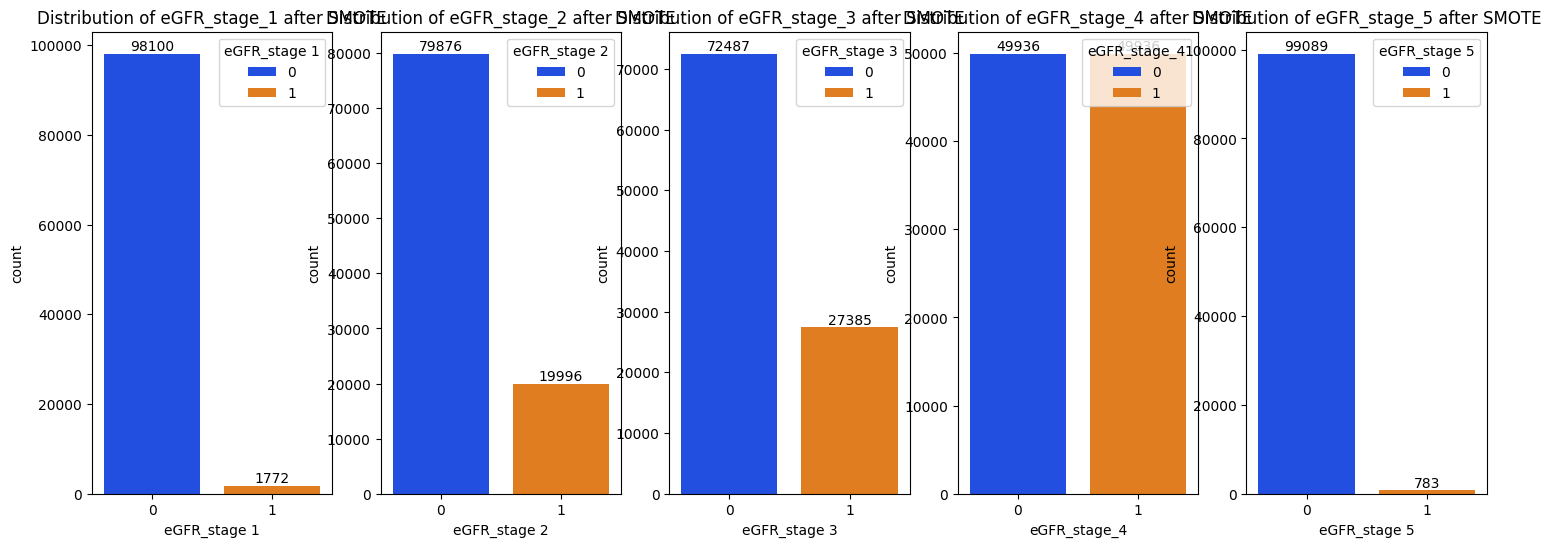

In [172]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution before SMOTE
plt.figure(figsize=(18, 6))

# Plot distribution before SMOTE - eGFR_stage_1
plt.subplot(1, 5, 1)
g0_before_stage_1 = sns.countplot(dummy_data, x='eGFR_stage 1', hue='eGFR_stage 1', palette='bright', dodge=False)
g0_before_stage_1.bar_label(g0_before_stage_1.containers[0])
g0_before_stage_1.bar_label(g0_before_stage_1.containers[1])
plt.title('Distribution of eGFR_stage_1 before SMOTE')

# Plot distribution before SMOTE - eGFR_stage_2
plt.subplot(1, 5, 2)
g0_before_stage_2 = sns.countplot(dummy_data, x='eGFR_stage 2', hue='eGFR_stage 2', palette='bright', dodge=False)
g0_before_stage_2.bar_label(g0_before_stage_2.containers[0])
g0_before_stage_2.bar_label(g0_before_stage_2.containers[1])
plt.title('Distribution of eGFR_stage_2 before SMOTE')

# Plot distribution before SMOTE - eGFR_stage_3a
plt.subplot(1, 5, 3)
g0_before_stage_3a = sns.countplot(dummy_data, x='eGFR_stage 3', hue='eGFR_stage 3', palette='bright', dodge=False)
g0_before_stage_3a.bar_label(g0_before_stage_3a.containers[0])
g0_before_stage_3a.bar_label(g0_before_stage_3a.containers[1])
plt.title('Distribution of eGFR_stage_3 before SMOTE')

# Plot distribution before SMOTE - eGFR_stage_4
plt.subplot(1, 5, 4)
g0_before_stage_4 = sns.countplot(dummy_data, x='eGFR_stage 4', hue='eGFR_stage 4', palette='bright', dodge=False)
g0_before_stage_4.bar_label(g0_before_stage_4.containers[0])
g0_before_stage_4.bar_label(g0_before_stage_4.containers[1])
plt.title('Distribution of eGFR_stage_4 before SMOTE')

# Plot distribution before SMOTE - eGFR_stage_5
plt.subplot(1, 5, 5)
g0_before_stage_5 = sns.countplot(dummy_data, x='eGFR_stage 5', hue='eGFR_stage 5', palette='bright', dodge=False)
g0_before_stage_5.bar_label(g0_before_stage_5.containers[0])
g0_before_stage_5.bar_label(g0_before_stage_5.containers[1])
plt.title('Distribution of eGFR_stage_5 before SMOTE')
plt.show()

# Plot distribution after SMOTE
plt.figure(figsize=(18, 6))

# Plot distribution after SMOTE - eGFR_stage_1
plt.subplot(1, 5, 1)
g0_after_stage_1 = sns.countplot(df_resampled_egfr_4, x='eGFR_stage 1', hue='eGFR_stage 1', palette='bright', dodge=False)
g0_after_stage_1.bar_label(g0_after_stage_1.containers[0])
g0_after_stage_1.bar_label(g0_after_stage_1.containers[1])
plt.title('Distribution of eGFR_stage_1 after SMOTE')

# Plot distribution after SMOTE - eGFR_stage_2
plt.subplot(1, 5, 2)
g0_after_stage_2 = sns.countplot(df_resampled_egfr_4, x='eGFR_stage 2', hue='eGFR_stage 2', palette='bright', dodge=False)
g0_after_stage_2.bar_label(g0_after_stage_2.containers[0])
g0_after_stage_2.bar_label(g0_after_stage_2.containers[1])
plt.title('Distribution of eGFR_stage_2 after SMOTE')

# Plot distribution after SMOTE - eGFR_stage_3a
plt.subplot(1, 5, 3)
g0_after_stage_3a = sns.countplot(df_resampled_egfr_4, x='eGFR_stage 3', hue='eGFR_stage 3', palette='bright', dodge=False)
g0_after_stage_3a.bar_label(g0_after_stage_3a.containers[0])
g0_after_stage_3a.bar_label(g0_after_stage_3a.containers[1])
plt.title('Distribution of eGFR_stage_3 after SMOTE')

# Plot distribution after SMOTE - eGFR_stage_4
plt.subplot(1, 5, 4)
g0_after_stage_4 = sns.countplot(df_resampled_egfr_4, x='eGFR_stage_4', hue='eGFR_stage_4', palette='bright', dodge=False)
g0_after_stage_4.bar_label(g0_after_stage_4.containers[0])
g0_after_stage_4.bar_label(g0_after_stage_4.containers[1])
plt.title('Distribution of eGFR_stage_4 after SMOTE')

# Plot distribution after SMOTE - eGFR_stage_5
plt.subplot(1, 5, 5)
g0_after_stage_5 = sns.countplot(df_resampled_egfr_4, x='eGFR_stage 5', hue='eGFR_stage 5', palette='bright', dodge=False)
g0_after_stage_5.bar_label(g0_after_stage_5.containers[0])
g0_after_stage_5.bar_label(g0_after_stage_5.containers[1])
plt.title('Distribution of eGFR_stage_5 after SMOTE')

plt.show()

In [176]:
resampled_egfr_4 = df_resampled_egfr_4.astype(bool)
resampled_egfr_4.head()

,InPatient,OutPatient,Emergency,G1M2-ARB,G3M1-Statin,G5M2-NSAIDs,G1M5-Diuretic,G1M7-Beta-blocker,G1M3-Dihydropyridine-CCB,G1M6-MRA,...,LDL-Cholesterol_High,LDL-Cholesterol_Near Optimal,LDL-Cholesterol_Optimal,LDL-Cholesterol_Very High,HDL-Cholesterol_AT-Risk,HDL-Cholesterol_Dangerous,HDL-Cholesterol_Heart-Healthy,UPCR_Moderately,UPCR_Normal,eGFR_stage_4
0,False,True,False,True,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,True,False
1,False,True,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
2,False,True,False,True,True,True,False,False,False,False,...,False,True,False,False,False,False,True,False,True,False
3,False,True,False,True,False,True,True,False,False,False,...,False,False,False,False,False,False,True,False,True,False
4,False,True,False,True,False,True,False,False,False,False,...,False,True,False,False,False,False,True,False,True,False


In [175]:
resampled_egfr_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99872 entries, 0 to 99871
Columns: 128 entries, InPatient to eGFR_stage_4
dtypes: bool(128)
memory usage: 12.2 MB


In [177]:
#resampled_egfr_4.to_csv('resampled_egfr_4.csv')

#### eGFR_stage_5

In [178]:
# Find column names in dummy_data that start with "eGFR"
egfr_columns = [col for col in dummy_data.columns if col.startswith('eGFR')]

# Display the found columns
print(egfr_columns)

['eGFR_stage 1', 'eGFR_stage 2', 'eGFR_stage 3', 'eGFR_stage 4', 'eGFR_stage 5']


In [179]:
df_target_eGFR_stage_5 = dummy_data['eGFR_stage 5']
df_feature_eGFR_stage_5 = dummy_data.drop(['eGFR_stage 5','Slopes_Better', 'Slopes_Between', 'Slopes_Worse'], axis=1)

In [180]:
from imblearn.over_sampling import SMOTE
# transform the dataset
oversample_egfr = SMOTE()
X_resampled_egfr_5, y_resampled_egfr_5 = oversample_egfr.fit_resample(df_feature_eGFR_stage_5, df_target_eGFR_stage_5)

In [181]:
# Convert the resampled data to DataFrames for 'Slopes'
df_resampled_egfr_5 = pd.DataFrame(X_resampled_egfr_5, columns=df_feature_eGFR_stage_5.columns)
df_resampled_egfr_5['eGFR_stage_5'] = y_resampled_egfr_5

<ipython-input-181-b5583c2fe4d1>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_resampled_egfr_5['eGFR_stage_5'] = y_resampled_egfr_5


In [182]:
df_resampled_egfr_5.head()

,InPatient,OutPatient,Emergency,G1M2-ARB,G3M1-Statin,G5M2-NSAIDs,G1M5-Diuretic,G1M7-Beta-blocker,G1M3-Dihydropyridine-CCB,G1M6-MRA,...,LDL-Cholesterol_High,LDL-Cholesterol_Near Optimal,LDL-Cholesterol_Optimal,LDL-Cholesterol_Very High,HDL-Cholesterol_AT-Risk,HDL-Cholesterol_Dangerous,HDL-Cholesterol_Heart-Healthy,UPCR_Moderately,UPCR_Normal,eGFR_stage_5
0,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
1,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,1,0,1,1,1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
3,0,1,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,0,1,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0


In [184]:
egfr_test1 = df_resampled_egfr_5[['eGFR_stage 1', 'eGFR_stage 2', 'eGFR_stage 3', 'eGFR_stage 4', 'eGFR_stage_5']]
egfr_test1

,eGFR_stage 1,eGFR_stage 2,eGFR_stage 3,eGFR_stage 4,eGFR_stage_5
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,0,1,0,0
...,...,...,...,...,...
103669,0,0,0,0,1
103670,0,0,0,0,1
103671,0,0,0,0,1
103672,0,0,0,0,1


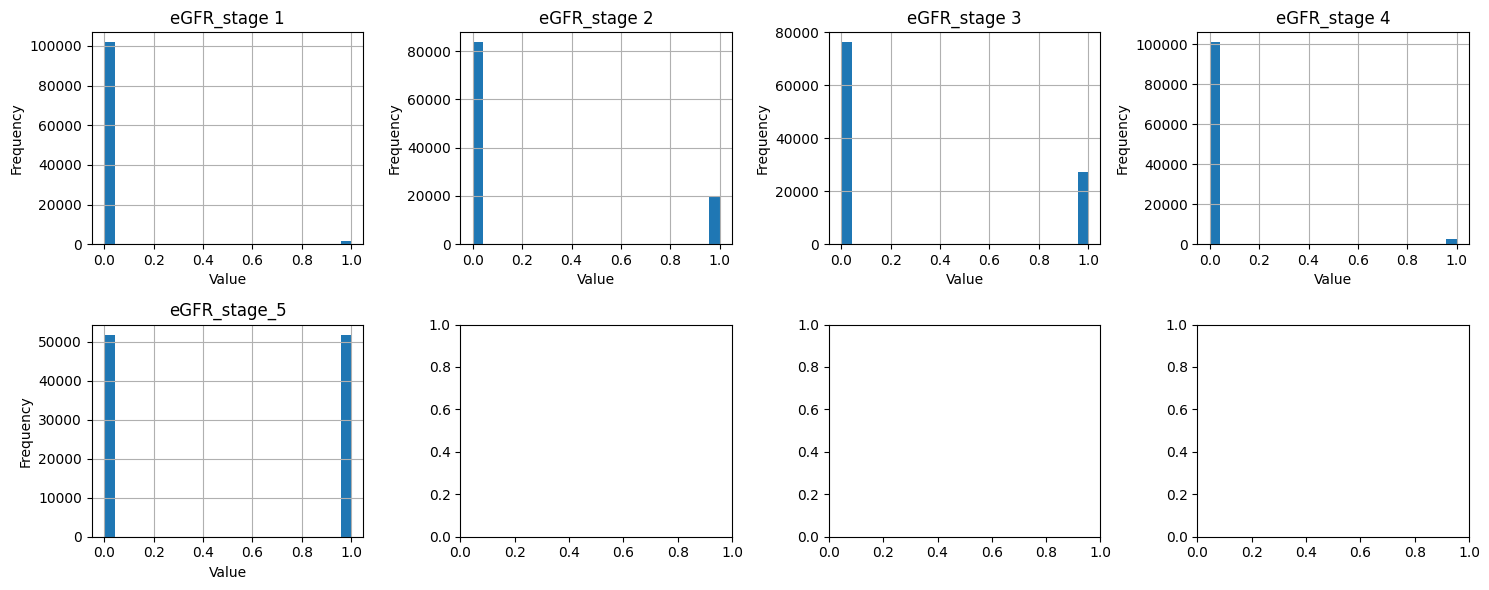

In [185]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
num_variables = len(egfr_test1.columns)
num_rows = (num_variables // 4) + (num_variables % 4 > 0)
num_cols = min(num_variables, 4)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3))

# Flatten axes if necessary
axes = axes.flatten()

# Plot histogram for each variable
for i, (col, ax) in enumerate(zip(egfr_test1.columns, axes)):
    egfr_test1[col].hist(bins=24, ax=ax)
    ax.set_title(col)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

In [186]:
df_resampled_egfr_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103674 entries, 0 to 103673
Columns: 128 entries, InPatient to eGFR_stage_5
dtypes: int64(43), uint8(85)
memory usage: 42.4 MB


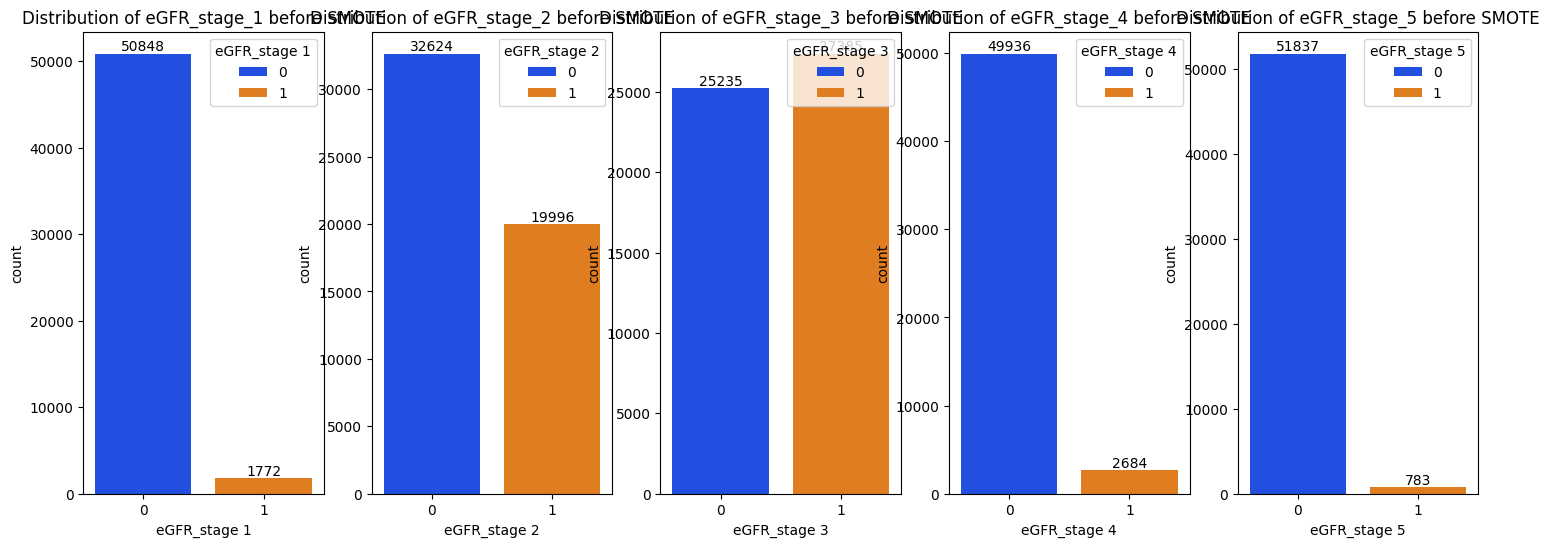

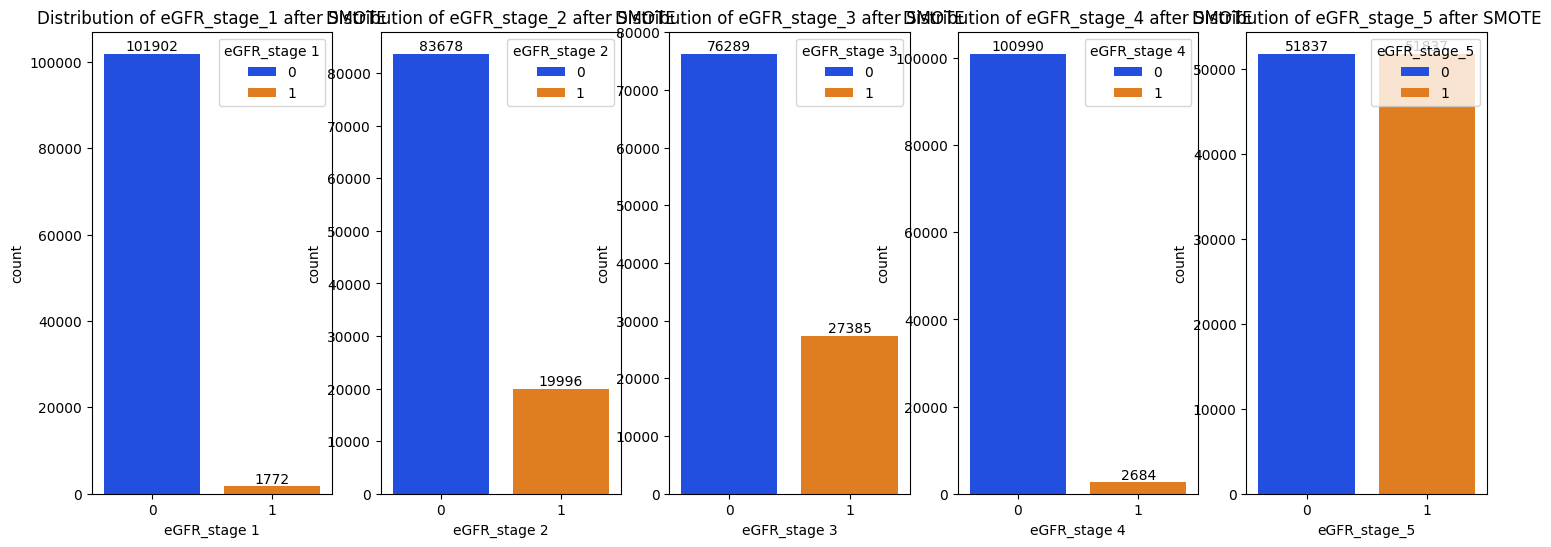

In [187]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution before SMOTE
plt.figure(figsize=(18, 6))

# Plot distribution before SMOTE - eGFR_stage_1
plt.subplot(1, 5, 1)
g0_before_stage_1 = sns.countplot(dummy_data, x='eGFR_stage 1', hue='eGFR_stage 1', palette='bright', dodge=False)
g0_before_stage_1.bar_label(g0_before_stage_1.containers[0])
g0_before_stage_1.bar_label(g0_before_stage_1.containers[1])
plt.title('Distribution of eGFR_stage_1 before SMOTE')

# Plot distribution before SMOTE - eGFR_stage_2
plt.subplot(1, 5, 2)
g0_before_stage_2 = sns.countplot(dummy_data, x='eGFR_stage 2', hue='eGFR_stage 2', palette='bright', dodge=False)
g0_before_stage_2.bar_label(g0_before_stage_2.containers[0])
g0_before_stage_2.bar_label(g0_before_stage_2.containers[1])
plt.title('Distribution of eGFR_stage_2 before SMOTE')

# Plot distribution before SMOTE - eGFR_stage_3a
plt.subplot(1, 5, 3)
g0_before_stage_3a = sns.countplot(dummy_data, x='eGFR_stage 3', hue='eGFR_stage 3', palette='bright', dodge=False)
g0_before_stage_3a.bar_label(g0_before_stage_3a.containers[0])
g0_before_stage_3a.bar_label(g0_before_stage_3a.containers[1])
plt.title('Distribution of eGFR_stage_3 before SMOTE')

# Plot distribution before SMOTE - eGFR_stage_4
plt.subplot(1, 5, 4)
g0_before_stage_4 = sns.countplot(dummy_data, x='eGFR_stage 4', hue='eGFR_stage 4', palette='bright', dodge=False)
g0_before_stage_4.bar_label(g0_before_stage_4.containers[0])
g0_before_stage_4.bar_label(g0_before_stage_4.containers[1])
plt.title('Distribution of eGFR_stage_4 before SMOTE')

# Plot distribution before SMOTE - eGFR_stage_5
plt.subplot(1, 5, 5)
g0_before_stage_5 = sns.countplot(dummy_data, x='eGFR_stage 5', hue='eGFR_stage 5', palette='bright', dodge=False)
g0_before_stage_5.bar_label(g0_before_stage_5.containers[0])
g0_before_stage_5.bar_label(g0_before_stage_5.containers[1])
plt.title('Distribution of eGFR_stage_5 before SMOTE')
plt.show()

# Plot distribution after SMOTE
plt.figure(figsize=(18, 6))

# Plot distribution after SMOTE - eGFR_stage_1
plt.subplot(1, 5, 1)
g0_after_stage_1 = sns.countplot(df_resampled_egfr_5, x='eGFR_stage 1', hue='eGFR_stage 1', palette='bright', dodge=False)
g0_after_stage_1.bar_label(g0_after_stage_1.containers[0])
g0_after_stage_1.bar_label(g0_after_stage_1.containers[1])
plt.title('Distribution of eGFR_stage_1 after SMOTE')

# Plot distribution after SMOTE - eGFR_stage_2
plt.subplot(1, 5, 2)
g0_after_stage_2 = sns.countplot(df_resampled_egfr_5, x='eGFR_stage 2', hue='eGFR_stage 2', palette='bright', dodge=False)
g0_after_stage_2.bar_label(g0_after_stage_2.containers[0])
g0_after_stage_2.bar_label(g0_after_stage_2.containers[1])
plt.title('Distribution of eGFR_stage_2 after SMOTE')

# Plot distribution after SMOTE - eGFR_stage_3a
plt.subplot(1, 5, 3)
g0_after_stage_3a = sns.countplot(df_resampled_egfr_5, x='eGFR_stage 3', hue='eGFR_stage 3', palette='bright', dodge=False)
g0_after_stage_3a.bar_label(g0_after_stage_3a.containers[0])
g0_after_stage_3a.bar_label(g0_after_stage_3a.containers[1])
plt.title('Distribution of eGFR_stage_3 after SMOTE')

# Plot distribution after SMOTE - eGFR_stage_4
plt.subplot(1, 5, 4)
g0_after_stage_4 = sns.countplot(df_resampled_egfr_5, x='eGFR_stage 4', hue='eGFR_stage 4', palette='bright', dodge=False)
g0_after_stage_4.bar_label(g0_after_stage_4.containers[0])
g0_after_stage_4.bar_label(g0_after_stage_4.containers[1])
plt.title('Distribution of eGFR_stage_4 after SMOTE')

# Plot distribution after SMOTE - eGFR_stage_5
plt.subplot(1, 5, 5)
g0_after_stage_5 = sns.countplot(df_resampled_egfr_5, x='eGFR_stage_5', hue='eGFR_stage_5', palette='bright', dodge=False)
g0_after_stage_5.bar_label(g0_after_stage_5.containers[0])
g0_after_stage_5.bar_label(g0_after_stage_5.containers[1])
plt.title('Distribution of eGFR_stage_5 after SMOTE')

plt.show()

In [188]:
resampled_egfr_5 = df_resampled_egfr_5.astype(bool)
resampled_egfr_5.head()

,InPatient,OutPatient,Emergency,G1M2-ARB,G3M1-Statin,G5M2-NSAIDs,G1M5-Diuretic,G1M7-Beta-blocker,G1M3-Dihydropyridine-CCB,G1M6-MRA,...,LDL-Cholesterol_High,LDL-Cholesterol_Near Optimal,LDL-Cholesterol_Optimal,LDL-Cholesterol_Very High,HDL-Cholesterol_AT-Risk,HDL-Cholesterol_Dangerous,HDL-Cholesterol_Heart-Healthy,UPCR_Moderately,UPCR_Normal,eGFR_stage_5
0,False,True,False,True,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,True,False
1,False,True,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
2,False,True,False,True,True,True,False,False,False,False,...,False,True,False,False,False,False,True,False,True,False
3,False,True,False,True,False,True,True,False,False,False,...,False,False,False,False,False,False,True,False,True,False
4,False,True,False,True,False,True,False,False,False,False,...,False,True,False,False,False,False,True,False,True,False


In [189]:
resampled_egfr_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103674 entries, 0 to 103673
Columns: 128 entries, InPatient to eGFR_stage_5
dtypes: bool(128)
memory usage: 12.7 MB


In [191]:
#resampled_egfr_5.to_csv('resampled_egfr_5.csv')

### Multi-Class Classification

In [89]:
df_target_slopes = data['Slopes']
df_target_egfr = data['eGFR']
df_feature = data.drop(['Slopes', 'eGFR'], axis=1)

In [90]:
# Categorical columns for one-hot encoding
df_categorical_columns = ['NATNL', 'Sex', 'Age', 'BMI', 'BSA', 'DBP', 'SBP','BUN',
                                  'Sodium', 'Potassium', 'Chloride', 'Bicarbonate', 'Uric', 'Calcium', 'Phosphorus',
                                  'Albumin', 'Hemoglobin', 'Hematocrit', 'WBC', 'Platelet', 'Blood-sugar', 'HbA1c',
                                  'Cholesterol', 'Triglyceride', 'LDL-Cholesterol', 'HDL-Cholesterol', 'UPCR']
# Select categorical columns from the DataFrame
df_feature[df_categorical_columns] = df_feature[df_categorical_columns]

In [91]:
# One-hot encode categorical columns
dummy_data = pd.get_dummies(df_feature, columns=df_categorical_columns)
dummy_data.shape

(52620, 123)

In [92]:
# Apply SMOTE separately for each target variable
from imblearn.over_sampling import SMOTE
oversample_slopes = SMOTE()
X_resampled_slopes, y_resampled_slopes = oversample_slopes.fit_resample(dummy_data, df_target_slopes)

oversample_egfr = SMOTE()
X_resampled_egfr, y_resampled_egfr = oversample_egfr.fit_resample(dummy_data, df_target_egfr)

In [93]:
df_resampled_slopes = pd.DataFrame(X_resampled_slopes, columns=dummy_data.columns)
df_resampled_slopes['Slopes'] = y_resampled_slopes

# Convert the resampled data to DataFrames for 'eGFR'
df_resampled_egfr = pd.DataFrame(X_resampled_egfr, columns=dummy_data.columns)
df_resampled_egfr['eGFR'] = y_resampled_egfr

<ipython-input-93-53a2c9d7061a>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_resampled_slopes['Slopes'] = y_resampled_slopes
<ipython-input-93-53a2c9d7061a>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_resampled_egfr['eGFR'] = y_resampled_egfr


#### Slopes

In [94]:
#df_resampled_cat = pd.concat([df_resampled_slopes,df_resampled_egfr ],axis=1)
#df_resampled_cat = df_resampled_cat.loc[:,~df_resampled_cat.columns.duplicated()]

In [95]:
df_resampled_slopes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103938 entries, 0 to 103937
Columns: 124 entries, InPatient to Slopes
dtypes: category(1), int64(43), uint8(80)
memory usage: 42.1 MB


In [96]:
df_resampled_slopes.head()

,InPatient,OutPatient,Emergency,G1M2-ARB,G3M1-Statin,G5M2-NSAIDs,G1M5-Diuretic,G1M7-Beta-blocker,G1M3-Dihydropyridine-CCB,G1M6-MRA,...,LDL-Cholesterol_High,LDL-Cholesterol_Near Optimal,LDL-Cholesterol_Optimal,LDL-Cholesterol_Very High,HDL-Cholesterol_AT-Risk,HDL-Cholesterol_Dangerous,HDL-Cholesterol_Heart-Healthy,UPCR_Moderately,UPCR_Normal,Slopes
0,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,Better
1,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,Worse
2,0,1,0,1,1,1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,Better
3,0,1,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,1,Better
4,0,1,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,Worse


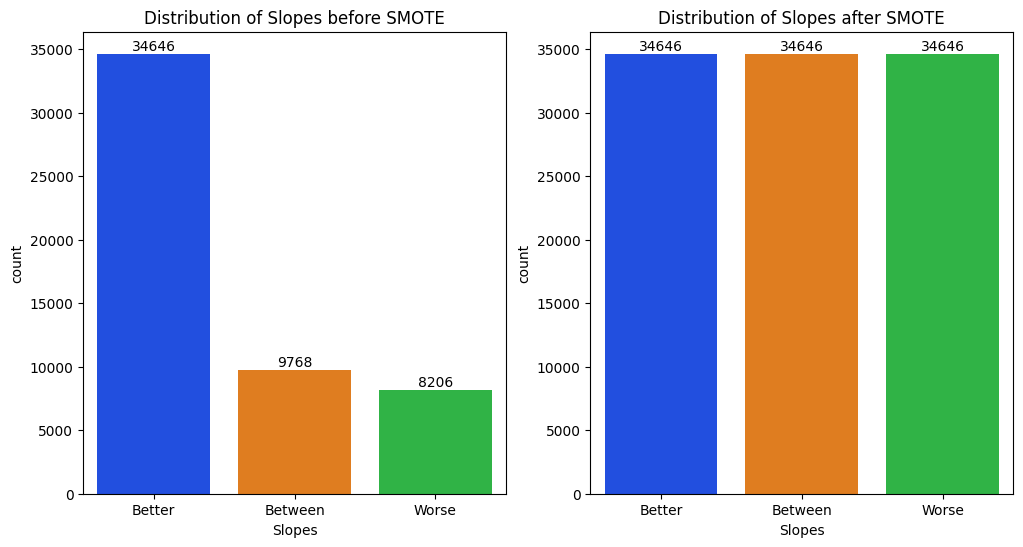

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution before SMOTE
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, subplot 1
g0_before = sns.countplot(data, x='Slopes', hue='Slopes', palette='bright', dodge=False)
g0_before.bar_label(g0_before.containers[0])
g0_before.bar_label(g0_before.containers[1])
g0_before.bar_label(g0_before.containers[2])
plt.title('Distribution of Slopes before SMOTE')

# Plot distribution after SMOTE
plt.subplot(1, 2, 2)  # 1 row, 2 columns, subplot 2
g0_after = sns.countplot(df_resampled_slopes, x='Slopes', hue='Slopes', palette='bright', dodge=False)
g0_after.bar_label(g0_after.containers[0])
g0_after.bar_label(g0_after.containers[1])
g0_after.bar_label(g0_after.containers[2])
plt.title('Distribution of Slopes after SMOTE')

plt.show()

In [98]:
import numpy as np
dummy_df_slopes = pd.get_dummies(df_resampled_slopes["Slopes"],dtype=np.int64,prefix="Slopes")
df_resampled_cat = pd.concat([df_resampled_slopes,dummy_df_slopes],axis=1)
df_resampled_cat = df_resampled_cat.loc[:,~df_resampled_cat.columns.duplicated()]
df_resampled_cat = df_resampled_cat.drop(['Slopes'],axis=1)

In [99]:
df_resampled_cat.head()

,InPatient,OutPatient,Emergency,G1M2-ARB,G3M1-Statin,G5M2-NSAIDs,G1M5-Diuretic,G1M7-Beta-blocker,G1M3-Dihydropyridine-CCB,G1M6-MRA,...,LDL-Cholesterol_Optimal,LDL-Cholesterol_Very High,HDL-Cholesterol_AT-Risk,HDL-Cholesterol_Dangerous,HDL-Cholesterol_Heart-Healthy,UPCR_Moderately,UPCR_Normal,Slopes_Better,Slopes_Between,Slopes_Worse
0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
1,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
2,0,1,0,1,1,1,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
3,0,1,0,1,0,1,1,0,0,0,...,0,0,0,0,1,0,1,1,0,0
4,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1


In [100]:
df_resampled_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103938 entries, 0 to 103937
Columns: 126 entries, InPatient to Slopes_Worse
dtypes: int64(46), uint8(80)
memory usage: 44.4 MB


In [101]:
dummy_multi_slopes = df_resampled_cat.astype(bool) #multi-class
dummy_multi_slopes.head()

,InPatient,OutPatient,Emergency,G1M2-ARB,G3M1-Statin,G5M2-NSAIDs,G1M5-Diuretic,G1M7-Beta-blocker,G1M3-Dihydropyridine-CCB,G1M6-MRA,...,LDL-Cholesterol_Optimal,LDL-Cholesterol_Very High,HDL-Cholesterol_AT-Risk,HDL-Cholesterol_Dangerous,HDL-Cholesterol_Heart-Healthy,UPCR_Moderately,UPCR_Normal,Slopes_Better,Slopes_Between,Slopes_Worse
0,False,True,False,True,False,False,False,False,False,False,...,False,False,False,False,True,False,True,True,False,False
1,False,True,False,True,True,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,True
2,False,True,False,True,True,True,False,False,False,False,...,False,False,False,False,True,False,True,True,False,False
3,False,True,False,True,False,True,True,False,False,False,...,False,False,False,False,True,False,True,True,False,False
4,False,True,False,True,False,True,False,False,False,False,...,False,False,False,False,True,False,True,False,False,True


In [102]:
dummy_multi_slopes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103938 entries, 0 to 103937
Columns: 126 entries, InPatient to Slopes_Worse
dtypes: bool(126)
memory usage: 12.5 MB


In [103]:
#dummy_multi_slopes.to_csv('dummy_multi_slopes.csv')

#### eGFR

In [104]:
df_resampled_egfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136925 entries, 0 to 136924
Columns: 124 entries, InPatient to eGFR
dtypes: category(1), int64(43), uint8(80)
memory usage: 55.5 MB


In [105]:
df_resampled_egfr.head()

,InPatient,OutPatient,Emergency,G1M2-ARB,G3M1-Statin,G5M2-NSAIDs,G1M5-Diuretic,G1M7-Beta-blocker,G1M3-Dihydropyridine-CCB,G1M6-MRA,...,LDL-Cholesterol_High,LDL-Cholesterol_Near Optimal,LDL-Cholesterol_Optimal,LDL-Cholesterol_Very High,HDL-Cholesterol_AT-Risk,HDL-Cholesterol_Dangerous,HDL-Cholesterol_Heart-Healthy,UPCR_Moderately,UPCR_Normal,eGFR
0,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,stage 2
1,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,stage 2
2,0,1,0,1,1,1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,stage 2
3,0,1,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,1,stage 2
4,0,1,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,stage 3


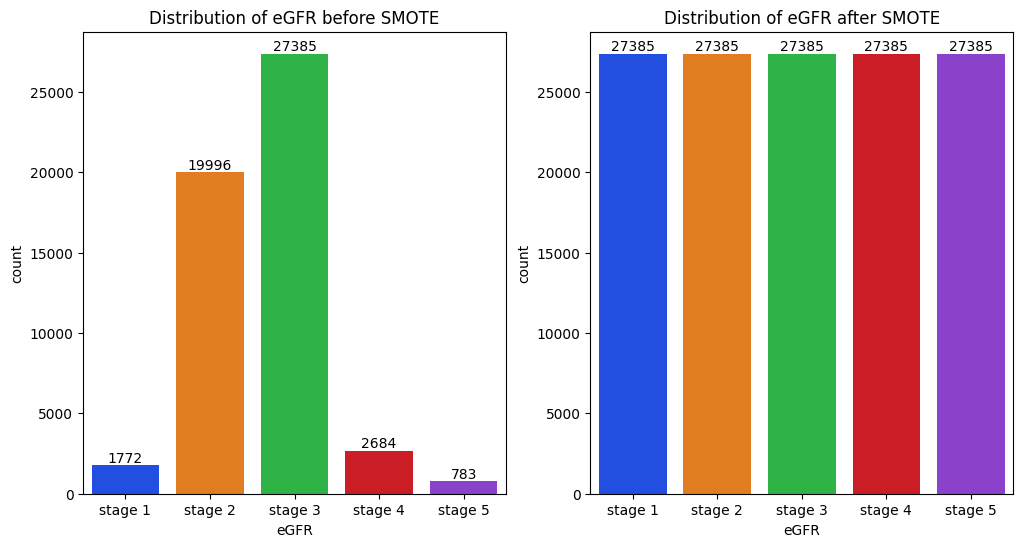

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution before SMOTE
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, subplot 1
g0_before = sns.countplot(data, x='eGFR', hue='eGFR', palette='bright', dodge=False)
g0_before.bar_label(g0_before.containers[0])
g0_before.bar_label(g0_before.containers[1])
g0_before.bar_label(g0_before.containers[2])
g0_before.bar_label(g0_before.containers[3])
g0_before.bar_label(g0_before.containers[4])
plt.title('Distribution of eGFR before SMOTE')

# Plot distribution after SMOTE
plt.subplot(1, 2, 2)  # 1 row, 2 columns, subplot 2
g0_after = sns.countplot(df_resampled_egfr, x='eGFR', hue='eGFR', palette='bright', dodge=False)
g0_after.bar_label(g0_after.containers[0])
g0_after.bar_label(g0_after.containers[1])
g0_after.bar_label(g0_after.containers[2])
g0_after.bar_label(g0_after.containers[3])
g0_after.bar_label(g0_after.containers[4])
plt.title('Distribution of eGFR after SMOTE')

plt.show()

In [107]:
import numpy as np
dummy_df_eGFR = pd.get_dummies(df_resampled_egfr["eGFR"],dtype=np.int64,prefix="eGFR")
df_resampled_cat = pd.concat([df_resampled_egfr,dummy_df_eGFR],axis=1)
df_resampled_cat = df_resampled_cat.loc[:,~df_resampled_cat.columns.duplicated()]
df_resampled_cat = df_resampled_cat.drop(['eGFR'],axis=1)

In [108]:
df_resampled_cat.head()

,InPatient,OutPatient,Emergency,G1M2-ARB,G3M1-Statin,G5M2-NSAIDs,G1M5-Diuretic,G1M7-Beta-blocker,G1M3-Dihydropyridine-CCB,G1M6-MRA,...,HDL-Cholesterol_AT-Risk,HDL-Cholesterol_Dangerous,HDL-Cholesterol_Heart-Healthy,UPCR_Moderately,UPCR_Normal,eGFR_stage 1,eGFR_stage 2,eGFR_stage 3,eGFR_stage 4,eGFR_stage 5
0,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
1,0,1,0,1,1,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
2,0,1,0,1,1,1,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
3,0,1,0,1,0,1,1,0,0,0,...,0,0,1,0,1,0,1,0,0,0
4,0,1,0,1,0,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0


In [109]:
df_resampled_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136925 entries, 0 to 136924
Columns: 128 entries, InPatient to eGFR_stage 5
dtypes: int64(48), uint8(80)
memory usage: 60.6 MB


In [110]:
dummy_multi_egfr = df_resampled_cat.astype(bool) #multi-class
dummy_multi_egfr.head()

,InPatient,OutPatient,Emergency,G1M2-ARB,G3M1-Statin,G5M2-NSAIDs,G1M5-Diuretic,G1M7-Beta-blocker,G1M3-Dihydropyridine-CCB,G1M6-MRA,...,HDL-Cholesterol_AT-Risk,HDL-Cholesterol_Dangerous,HDL-Cholesterol_Heart-Healthy,UPCR_Moderately,UPCR_Normal,eGFR_stage 1,eGFR_stage 2,eGFR_stage 3,eGFR_stage 4,eGFR_stage 5
0,False,True,False,True,False,False,False,False,False,False,...,False,False,True,False,True,False,True,False,False,False
1,False,True,False,True,True,False,False,False,False,False,...,False,False,True,False,True,False,True,False,False,False
2,False,True,False,True,True,True,False,False,False,False,...,False,False,True,False,True,False,True,False,False,False
3,False,True,False,True,False,True,True,False,False,False,...,False,False,True,False,True,False,True,False,False,False
4,False,True,False,True,False,True,False,False,False,False,...,False,False,True,False,True,False,False,True,False,False


In [111]:
dummy_multi_egfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136925 entries, 0 to 136924
Columns: 128 entries, InPatient to eGFR_stage 5
dtypes: bool(128)
memory usage: 16.7 MB


In [112]:
#dummy_multi_egfr.to_csv('dummy_multi_egfr.csv')

###SMOTE-Tomek Links

In [113]:
df_target_slopes = data['Slopes']
df_target_egfr = data['eGFR']
df_feature = data.drop(['Slopes', 'eGFR'], axis=1)

In [114]:
df_target_slopes.value_counts()

Better     34646
Between     9768
Worse       8206
Name: Slopes, dtype: int64

In [115]:
df_target_egfr.value_counts()

stage 3    27385
stage 2    19996
stage 4     2684
stage 1     1772
stage 5      783
Name: eGFR, dtype: int64

In [116]:
# Categorical columns for one-hot encoding
df_categorical_columns = ['NATNL', 'Sex', 'Age', 'BMI', 'BSA', 'DBP', 'SBP','BUN',
                                  'Sodium', 'Potassium', 'Chloride', 'Bicarbonate', 'Uric', 'Calcium', 'Phosphorus',
                                  'Albumin', 'Hemoglobin', 'Hematocrit', 'WBC', 'Platelet', 'Blood-sugar', 'HbA1c',
                                  'Cholesterol', 'Triglyceride', 'LDL-Cholesterol', 'HDL-Cholesterol', 'UPCR']
# Select categorical columns from the DataFrame
df_feature[df_categorical_columns] = df_feature[df_categorical_columns]

In [117]:
# One-hot encode categorical columns
df_feature_data= pd.get_dummies(df_feature, columns=df_categorical_columns)
df_feature_data.shape

(52620, 123)

In [118]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
# Define SMOTE-Tomek Links
resample=SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
X_slope, y_slope = resample.fit_resample(df_feature_data, df_target_slopes)

resample=SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
X_egfr, y_egfr = resample.fit_resample(df_feature_data, df_target_egfr)

In [119]:
df_slopes = pd.DataFrame(X_slope, columns=df_feature_data.columns)
df_slopes['Slopes'] = y_slope

# Convert the resampled data to DataFrames for 'eGFR'
df_egfr = pd.DataFrame(X_egfr, columns=df_feature_data.columns)
df_egfr['eGFR'] = y_egfr

<ipython-input-119-09b861511da6>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_slopes['Slopes'] = y_slope
<ipython-input-119-09b861511da6>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_egfr['eGFR'] = y_egfr


#### Slopes

In [120]:
df_slopes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102585 entries, 0 to 102584
Columns: 124 entries, InPatient to Slopes
dtypes: category(1), int64(43), uint8(80)
memory usage: 41.6 MB


In [121]:
df_slopes.head()

,InPatient,OutPatient,Emergency,G1M2-ARB,G3M1-Statin,G5M2-NSAIDs,G1M5-Diuretic,G1M7-Beta-blocker,G1M3-Dihydropyridine-CCB,G1M6-MRA,...,LDL-Cholesterol_High,LDL-Cholesterol_Near Optimal,LDL-Cholesterol_Optimal,LDL-Cholesterol_Very High,HDL-Cholesterol_AT-Risk,HDL-Cholesterol_Dangerous,HDL-Cholesterol_Heart-Healthy,UPCR_Moderately,UPCR_Normal,Slopes
0,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,Better
1,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,Worse
2,0,1,0,1,1,1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,Better
3,0,1,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,1,Better
4,0,1,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,Worse


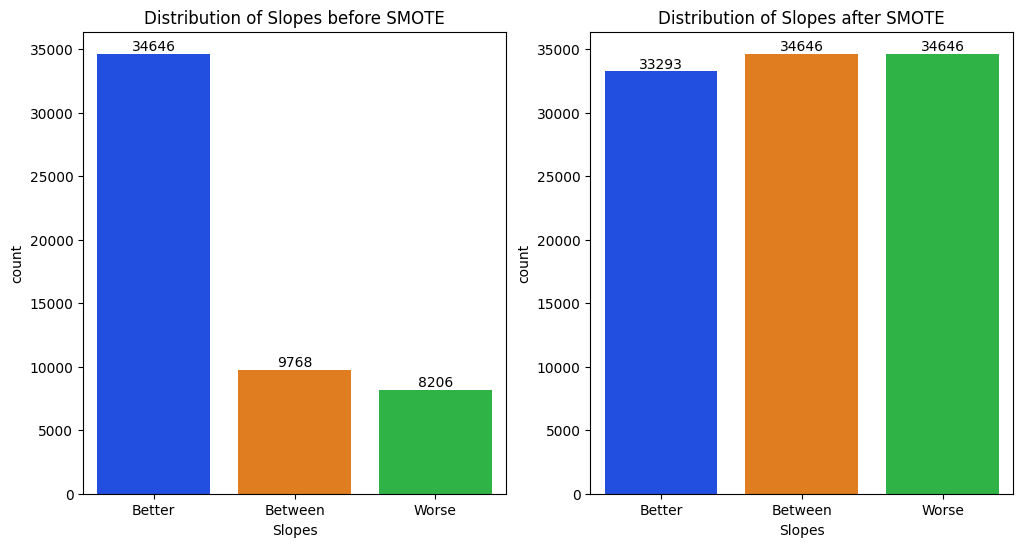

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution before SMOTE
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, subplot 1
g0_before = sns.countplot(data, x='Slopes', hue='Slopes', palette='bright', dodge=False)
g0_before.bar_label(g0_before.containers[0])
g0_before.bar_label(g0_before.containers[1])
g0_before.bar_label(g0_before.containers[2])
plt.title('Distribution of Slopes before SMOTE')

# Plot distribution after SMOTE
plt.subplot(1, 2, 2)  # 1 row, 2 columns, subplot 2
g0_after = sns.countplot(df_slopes, x='Slopes', hue='Slopes', palette='bright', dodge=False)
g0_after.bar_label(g0_after.containers[0])
g0_after.bar_label(g0_after.containers[1])
g0_after.bar_label(g0_after.containers[2])
plt.title('Distribution of Slopes after SMOTE')

plt.show()

In [123]:
import numpy as np
dummy_slopes = pd.get_dummies(df_slopes["Slopes"],dtype=np.int64,prefix="Slopes")
df_resampled_cat = pd.concat([df_slopes,dummy_slopes],axis=1)
df_resampled_cat = df_resampled_cat.loc[:,~df_resampled_cat.columns.duplicated()]
df_resampled_cat = df_resampled_cat.drop(['Slopes'],axis=1)

In [124]:
df_resampled_cat.head()

,InPatient,OutPatient,Emergency,G1M2-ARB,G3M1-Statin,G5M2-NSAIDs,G1M5-Diuretic,G1M7-Beta-blocker,G1M3-Dihydropyridine-CCB,G1M6-MRA,...,LDL-Cholesterol_Optimal,LDL-Cholesterol_Very High,HDL-Cholesterol_AT-Risk,HDL-Cholesterol_Dangerous,HDL-Cholesterol_Heart-Healthy,UPCR_Moderately,UPCR_Normal,Slopes_Better,Slopes_Between,Slopes_Worse
0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
1,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
2,0,1,0,1,1,1,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
3,0,1,0,1,0,1,1,0,0,0,...,0,0,0,0,1,0,1,1,0,0
4,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1


In [125]:
df_resampled_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102585 entries, 0 to 102584
Columns: 126 entries, InPatient to Slopes_Worse
dtypes: int64(46), uint8(80)
memory usage: 43.8 MB


In [126]:
dummy_tomek_slopes = df_resampled_cat.astype(bool) #smote-tomek
dummy_tomek_slopes.head()

,InPatient,OutPatient,Emergency,G1M2-ARB,G3M1-Statin,G5M2-NSAIDs,G1M5-Diuretic,G1M7-Beta-blocker,G1M3-Dihydropyridine-CCB,G1M6-MRA,...,LDL-Cholesterol_Optimal,LDL-Cholesterol_Very High,HDL-Cholesterol_AT-Risk,HDL-Cholesterol_Dangerous,HDL-Cholesterol_Heart-Healthy,UPCR_Moderately,UPCR_Normal,Slopes_Better,Slopes_Between,Slopes_Worse
0,False,True,False,True,False,False,False,False,False,False,...,False,False,False,False,True,False,True,True,False,False
1,False,True,False,True,True,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,True
2,False,True,False,True,True,True,False,False,False,False,...,False,False,False,False,True,False,True,True,False,False
3,False,True,False,True,False,True,True,False,False,False,...,False,False,False,False,True,False,True,True,False,False
4,False,True,False,True,False,True,False,False,False,False,...,False,False,False,False,True,False,True,False,False,True


In [127]:
dummy_tomek_slopes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102585 entries, 0 to 102584
Columns: 126 entries, InPatient to Slopes_Worse
dtypes: bool(126)
memory usage: 12.3 MB


In [128]:
#dummy_tomek_slopes.to_csv('dummy_tomek_slopes.csv')

#### eGFR

In [129]:
df_egfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136804 entries, 0 to 136803
Columns: 124 entries, InPatient to eGFR
dtypes: category(1), int64(43), uint8(80)
memory usage: 55.4 MB


In [130]:
df_egfr.head()

,InPatient,OutPatient,Emergency,G1M2-ARB,G3M1-Statin,G5M2-NSAIDs,G1M5-Diuretic,G1M7-Beta-blocker,G1M3-Dihydropyridine-CCB,G1M6-MRA,...,LDL-Cholesterol_High,LDL-Cholesterol_Near Optimal,LDL-Cholesterol_Optimal,LDL-Cholesterol_Very High,HDL-Cholesterol_AT-Risk,HDL-Cholesterol_Dangerous,HDL-Cholesterol_Heart-Healthy,UPCR_Moderately,UPCR_Normal,eGFR
0,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,stage 2
1,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,stage 2
2,0,1,0,1,1,1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,stage 2
3,0,1,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,1,stage 2
4,0,1,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,stage 3


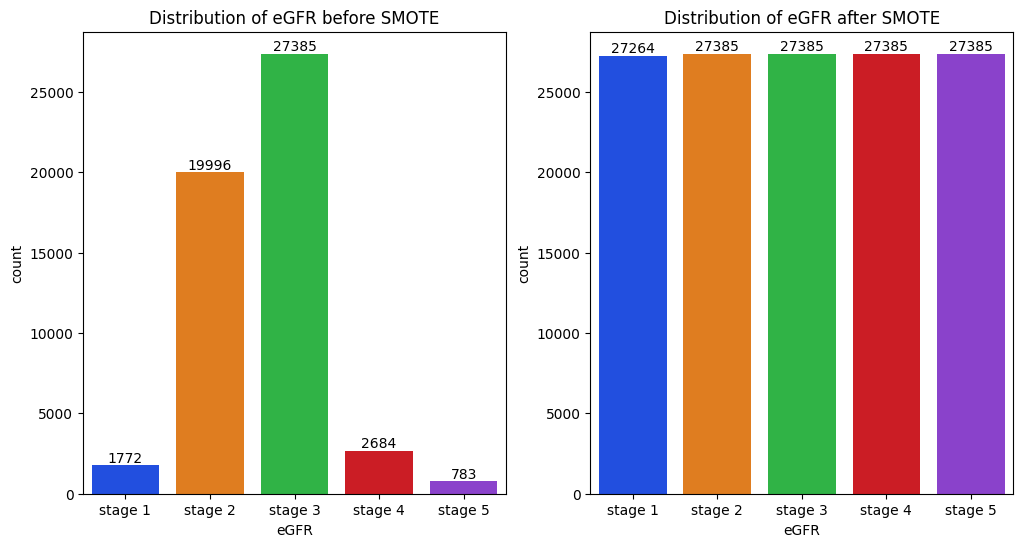

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution before SMOTE
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, subplot 1
g0_before = sns.countplot(data, x='eGFR', hue='eGFR', palette='bright', dodge=False)
g0_before.bar_label(g0_before.containers[0])
g0_before.bar_label(g0_before.containers[1])
g0_before.bar_label(g0_before.containers[2])
g0_before.bar_label(g0_before.containers[3])
g0_before.bar_label(g0_before.containers[4])
plt.title('Distribution of eGFR before SMOTE')

# Plot distribution after SMOTE
plt.subplot(1, 2, 2)  # 1 row, 2 columns, subplot 2
g0_after = sns.countplot(df_egfr, x='eGFR', hue='eGFR', palette='bright', dodge=False)
g0_after.bar_label(g0_after.containers[0])
g0_after.bar_label(g0_after.containers[1])
g0_after.bar_label(g0_after.containers[2])
g0_after.bar_label(g0_after.containers[3])
g0_after.bar_label(g0_after.containers[4])
plt.title('Distribution of eGFR after SMOTE')

plt.show()

In [132]:
import numpy as np
dummy_eGFR = pd.get_dummies(df_egfr["eGFR"],dtype=np.int64,prefix="eGFR")
df_resampled_cat = pd.concat([df_egfr,dummy_eGFR],axis=1)
df_resampled_cat = df_resampled_cat.loc[:,~df_resampled_cat.columns.duplicated()]
df_resampled_cat = df_resampled_cat.drop(['eGFR'],axis=1)

In [133]:
df_resampled_cat.head()

,InPatient,OutPatient,Emergency,G1M2-ARB,G3M1-Statin,G5M2-NSAIDs,G1M5-Diuretic,G1M7-Beta-blocker,G1M3-Dihydropyridine-CCB,G1M6-MRA,...,HDL-Cholesterol_AT-Risk,HDL-Cholesterol_Dangerous,HDL-Cholesterol_Heart-Healthy,UPCR_Moderately,UPCR_Normal,eGFR_stage 1,eGFR_stage 2,eGFR_stage 3,eGFR_stage 4,eGFR_stage 5
0,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
1,0,1,0,1,1,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
2,0,1,0,1,1,1,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
3,0,1,0,1,0,1,1,0,0,0,...,0,0,1,0,1,0,1,0,0,0
4,0,1,0,1,0,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0


In [134]:
df_resampled_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136804 entries, 0 to 136803
Columns: 128 entries, InPatient to eGFR_stage 5
dtypes: int64(48), uint8(80)
memory usage: 60.5 MB


In [135]:
dummy_tomek_egfr = df_resampled_cat.astype(bool) #smote-tomek
dummy_tomek_egfr.head()

,InPatient,OutPatient,Emergency,G1M2-ARB,G3M1-Statin,G5M2-NSAIDs,G1M5-Diuretic,G1M7-Beta-blocker,G1M3-Dihydropyridine-CCB,G1M6-MRA,...,HDL-Cholesterol_AT-Risk,HDL-Cholesterol_Dangerous,HDL-Cholesterol_Heart-Healthy,UPCR_Moderately,UPCR_Normal,eGFR_stage 1,eGFR_stage 2,eGFR_stage 3,eGFR_stage 4,eGFR_stage 5
0,False,True,False,True,False,False,False,False,False,False,...,False,False,True,False,True,False,True,False,False,False
1,False,True,False,True,True,False,False,False,False,False,...,False,False,True,False,True,False,True,False,False,False
2,False,True,False,True,True,True,False,False,False,False,...,False,False,True,False,True,False,True,False,False,False
3,False,True,False,True,False,True,True,False,False,False,...,False,False,True,False,True,False,True,False,False,False
4,False,True,False,True,False,True,False,False,False,False,...,False,False,True,False,True,False,False,True,False,False


In [136]:
dummy_tomek_egfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136804 entries, 0 to 136803
Columns: 128 entries, InPatient to eGFR_stage 5
dtypes: bool(128)
memory usage: 16.7 MB


In [137]:
#dummy_tomek_egfr.to_csv('dummy_tomek_egfr..csv')